<div align="center"><img width="500" height="500" src="https://i.ibb.co/2yG1ZbR/Minimal-Cat-and-Book-Line-Art-Illustration-Logo.png" /></div>

---

# Executive Summary


## Project Description:

Our team accessed the U.S. Department of Transportation’s database to analyze 8 years of rail accidents across the United States. We utilized the full data science pipeline to analyze the data and create a classification model that would predict which company would be involved in a rail accident.


## Project Goals
- Determine which features are drivers of highway rail accidents and equipment rail accidents.
- Build a classification model for predicting which Railroad operator is most likely to be involved with a given accident. This information is used to enhance the overall analysis.


## Key Findings




---

# Imports and Set-Up

In [1]:
#Imports

#Common Python Libraries
import pandas as pd
import numpy as np

#import stats and testing
from scipy import stats

#Modules we created 
import acquire
import prepare
import explore
import preprocessing
from acquire import get_hwyrail, get_equiprail
from prepare import prep_hwy_df, prep_equip_df
from preprocessing import get_object_cols, get_numeric_X_cols, train_validate_test, min_max_scale, get_dummies

#Visualization Imports
import matplotlib.pyplot as plt
import seaborn as sns
#Sklearn Tools and Modules
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import sklearn.preprocessing

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

---

# Rail Equipment Data

# Step 1: Data Acquisition - Rail Equipment
> The data was obtained from the U.S. Department of Transportation:
        > - Data includes U.S. rail accidents from 2012-2020 for equipment and highway rail accidents <br>
        > - Data Structure: Two data frames, one for Highway Rail Accidents and the other for Rail Equipment Accidents 

In [2]:
#Acquire data using acquire.py module and get_equiprail function
df = acquire.get_equiprail()
#Preview dataframe
df.head()

,IYR,IMO,RAILROAD,INCDTNO,IYR2,IMO2,RR2,INCDTNO2,IYR3,IMO3,...,RCL,Latitude,Longitud,SIGNAL,MOPERA,ADJUNCT1,ADJUNCT2,ADJUNCT3,SUBDIV,Unnamed: 145
0,12,5,BNSF,GC0512102,NaN,NaN,NaN,NaN,12,5,...,0.0,29.755900,-95.293100,1,1,G,NaN,NaN,NORTH SHORE,NaN
1,12,5,BNSF,GC0512105,NaN,NaN,NaN,NaN,12,5,...,0.0,29.500571,-95.597089,2,5,Z,NaN,NaN,GALVESTON,NaN
2,12,2,NS,98074,12.0,2.0,CSX,100906,12,2,...,NaN,34.612981,-86.988133,1,1,B,NaN,NaN,ALABAMA,NaN
3,12,5,BNSF,GC0512106,NaN,NaN,NaN,NaN,12,5,...,0.0,31.446576,-96.207606,2,5,Z,NaN,NaN,HOUSTON,NaN
4,12,5,BNSF,GC0512112,NaN,NaN,NaN,NaN,12,5,...,0.0,29.772155,-95.384013,2,5,Z,NaN,NaN,HOUSTON,NaN


**Takeaways:**

---

# Step 2: Data Preparation - Rail Equipment 

> **Our approach:**
    > - The data contained over 100 columns, so we reduced the number of columns.  
    > - We dropped columns with 80% of null values, features not included in this analysis, and duplicated information columns. 
    > - We concatenated the date time values as a datetime object and dropped original columns for date and time. 
    > - We lowercased all column titles and converted latitude and longitude to string dtypes.
    > - We engineered two features, one for season and one for region. 
    > - We created a `prepare.py` module with functions to clean and prepare the data. 
    


In [3]:
#Preview the dataframe
df.head(2)

,IYR,IMO,RAILROAD,INCDTNO,IYR2,IMO2,RR2,INCDTNO2,IYR3,IMO3,...,RCL,Latitude,Longitud,SIGNAL,MOPERA,ADJUNCT1,ADJUNCT2,ADJUNCT3,SUBDIV,Unnamed: 145
0,12,5,BNSF,GC0512102,NaN,NaN,NaN,NaN,12,5,...,0.0,29.755900,-95.293100,1,1,G,NaN,NaN,NORTH SHORE,NaN
1,12,5,BNSF,GC0512105,NaN,NaN,NaN,NaN,12,5,...,0.0,29.500571,-95.597089,2,5,Z,NaN,NaN,GALVESTON,NaN


In [4]:
#Preview dataframe using prep_equip_df(df) function from prepare.py module
df = prepare.prep_equip_df(df)
df.shape

(10550, 37)

**Takeaways:**

---

# Step 3: Data Exploration - Rail Equipment 

> **Our approach:**
    > - Split the data to explore on the training data set
    > - Run univariate, bivariate, and  multivariate visulaizations for how features interact with each other and the target, railroad_company
    > - Run statistical tests to help answer questions that arose from exploration
    > - We created an `explore.py` module with functions for exploration. 

### Univariate Exploration - Rail Equipment 

In [5]:
cat_vars = ["railroad_company", "train_type", "cause", "typrr"]
quant_vars = ["accident_type", "state", "temp", "visibility", "weather", "train_speed", "train_direction", 
             "train_weight", "equip_damage", "track_damage"]

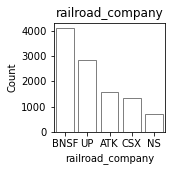

     railroad_company  Count  Percent
UP               BNSF   4090    38.77
BNSF               UP   2833    26.85
NS                ATK   1577    14.95
CSX               CSX   1352    12.82
ATK                NS    698     6.62
_________________________________________________________________


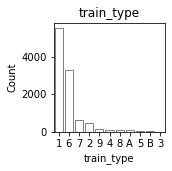

  train_type  Count  Percent
1          1   5524    52.36
7          6   3314    31.41
8          7    646     6.12
2          2    468     4.44
6          9    178     1.69
A          4    112     1.06
5          8     97     0.92
4          A     77     0.73
9          5     73     0.69
B          B     58     0.55
3          3      3     0.03
_________________________________________________________________


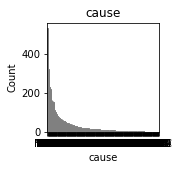

     cause  Count  Percent
H702  H503    534     5.06
M302  T111    517     4.90
T110  M404    434     4.11
H307  T314    326     3.09
T207  T102    302     2.86
...    ...    ...      ...
H301  E77L      1     0.01
E08L  E75L      1     0.01
E43C  H699      1     0.01
H199  H104      1     0.01
H502  E81C      1     0.01

[323 rows x 3 columns]
_________________________________________________________________


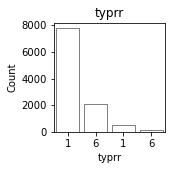

  typrr  Count  Percent
1     1   7783    73.77
1     6   2069    19.61
6     1    527     5.00
6     6    171     1.62
_________________________________________________________________


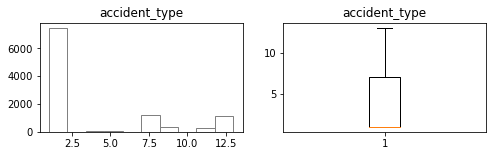

count    10550.000000
mean         3.525972
std          4.177437
min          1.000000
25%          1.000000
50%          1.000000
75%          7.000000
max         13.000000
Name: accident_type, dtype: float64


TypeError: unsupported operand type(s) for /: 'str' and 'int'

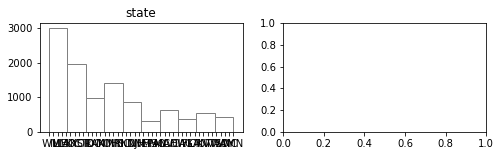

In [6]:
explore.explore_univariate(df, cat_vars, quant_vars)

### More Univariate Exploration - Rail Equipment 

In [7]:
cat_vars = ["railroad_company", "train_type", "cause", "typrr"]
quant_vars = ["total_killed", "total_injured", "max_speed", "total_damage", 
              "engineers_onduty", "conductors_onduty", "brakemen_onduty", "region",
             "signal_type"]

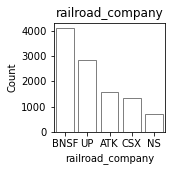

     railroad_company  Count  Percent
UP               BNSF   4090    38.77
BNSF               UP   2833    26.85
NS                ATK   1577    14.95
CSX               CSX   1352    12.82
ATK                NS    698     6.62
_________________________________________________________________


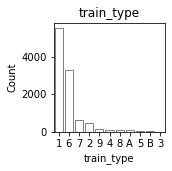

  train_type  Count  Percent
1          1   5524    52.36
7          6   3314    31.41
8          7    646     6.12
2          2    468     4.44
6          9    178     1.69
A          4    112     1.06
5          8     97     0.92
4          A     77     0.73
9          5     73     0.69
B          B     58     0.55
3          3      3     0.03
_________________________________________________________________


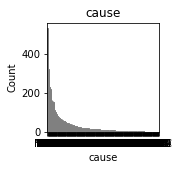

     cause  Count  Percent
H702  H503    534     5.06
M302  T111    517     4.90
T110  M404    434     4.11
H307  T314    326     3.09
T207  T102    302     2.86
...    ...    ...      ...
H301  E77L      1     0.01
E08L  E75L      1     0.01
E43C  H699      1     0.01
H199  H104      1     0.01
H502  E81C      1     0.01

[323 rows x 3 columns]
_________________________________________________________________


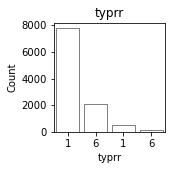

  typrr  Count  Percent
1     1   7783    73.77
1     6   2069    19.61
6     1    527     5.00
6     6    171     1.62
_________________________________________________________________


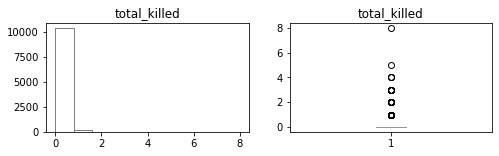

count    10550.000000
mean         0.024645
std          0.209634
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: total_killed, dtype: float64


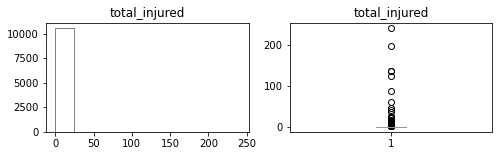

count    10550.000000
mean         0.233934
std          4.035587
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        241.000000
Name: total_injured, dtype: float64


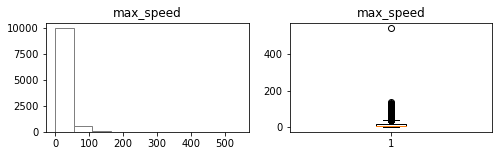

count    10550.000000
mean        15.507773
std         19.718607
min          0.000000
25%          4.000000
50%          7.000000
75%         18.000000
max        545.000000
Name: max_speed, dtype: float64


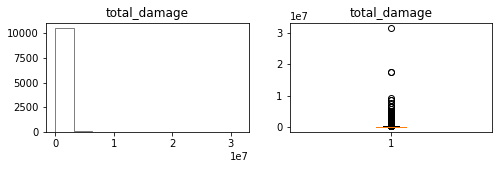

count    1.055000e+04
mean     1.570615e+05
std      5.912848e+05
min      3.200000e+01
25%      1.760750e+04
50%      3.293100e+04
75%      8.818675e+04
max      3.153875e+07
Name: total_damage, dtype: float64


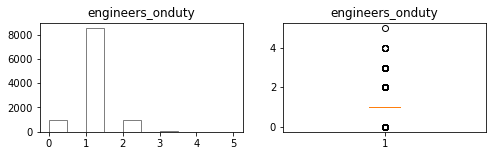

count    10550.000000
mean         1.025308
std          0.474014
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          5.000000
Name: engineers_onduty, dtype: float64


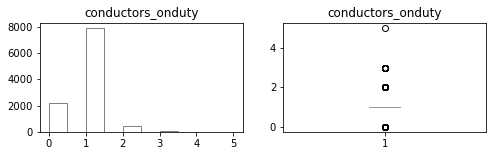

count    10550.000000
mean         0.836967
std          0.483257
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          5.000000
Name: conductors_onduty, dtype: float64


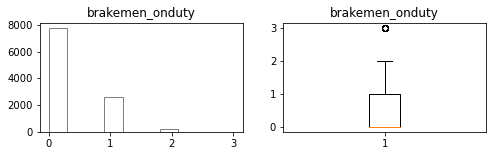

count    10550.000000
mean         0.284739
std          0.492877
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: brakemen_onduty, dtype: float64


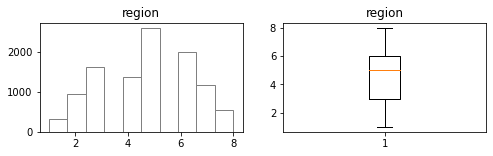

count    10550.000000
mean         4.734882
std          1.751114
min          1.000000
25%          3.000000
50%          5.000000
75%          6.000000
max          8.000000
Name: region, dtype: float64


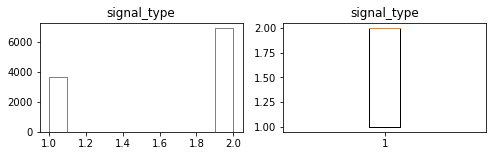

count    10550.000000
mean         1.653649
std          0.475829
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: signal_type, dtype: float64


In [8]:
explore.explore_univariate(df, cat_vars, quant_vars)

**Explore Outliers**

In [9]:
def outlier_report(df):
    '''
    This function takes in a data frame and returns
    print statments stating the upper and lower bound outliers for 
    each column
    '''
    
    columns_to_check = ["temp",
                        "train_speed",
                        "train_weight",
                        "equip_damage",
                        "track_damage","total_killed", "total_injured", "max_speed", "total_damage", 
                        "engineers_onduty", "conductors_onduty", "brakemen_onduty"]
    
    for col in columns_to_check:
        quartile_01, quartile_03 = np.percentile(df[col], [25, 75])
        iqr = quartile_03 - quartile_01
    
        lower_bound = round(quartile_01 -(2 * iqr), 3)
        upper_bound = round(quartile_03 +(2 * iqr), 3)
    
        #df['outlier'] = df[col].apply(lambda x: outlier_label(x, lower_bound, upper_bound))
    

        print(f"The lower and upper bound of the range for '{col}' respectively is: {lower_bound} and {upper_bound}")

In [10]:
outlier_report(df)

The lower and upper bound of the range for 'temp' respectively is: -25.0 and 145.0
The lower and upper bound of the range for 'train_speed' respectively is: -24.0 and 46.0
The lower and upper bound of the range for 'train_weight' respectively is: -13125.5 and 19688.25
The lower and upper bound of the range for 'equip_damage' respectively is: -66422.5 and 123967.5
The lower and upper bound of the range for 'track_damage' respectively is: -54165.5 and 81413.25
The lower and upper bound of the range for 'total_killed' respectively is: 0.0 and 0.0
The lower and upper bound of the range for 'total_injured' respectively is: 0.0 and 0.0
The lower and upper bound of the range for 'max_speed' respectively is: -24.0 and 46.0
The lower and upper bound of the range for 'total_damage' respectively is: -123551.0 and 229345.25
The lower and upper bound of the range for 'engineers_onduty' respectively is: 1.0 and 1.0
The lower and upper bound of the range for 'conductors_onduty' respectively is: 1.0 a

In [11]:
def visualize_outliers(df):
    '''
    This function takes in a dataframe
    and outputs boxplots to show outlier distribution
    for each column in the the dataframe
    '''
    cols_to_check = ["temp",
                    "train_speed",
                    "train_weight",
                    "equip_damage",
                    "track_damage","total_killed", "total_injured", "max_speed", "total_damage", 
                    "engineers_onduty", "conductors_onduty", "brakemen_onduty"]
    for col in cols_to_check:
        sns.boxplot(df[col])
        plt.title(col)
        plt.show()

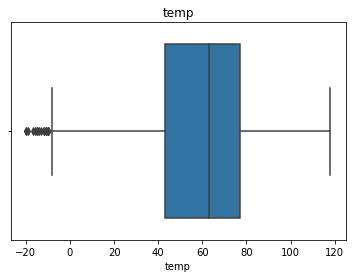

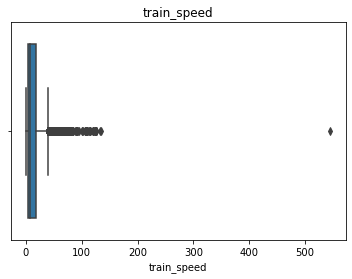

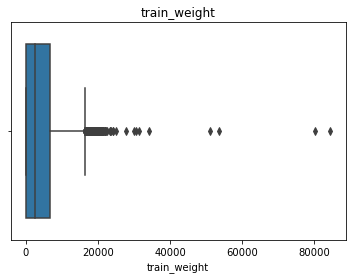

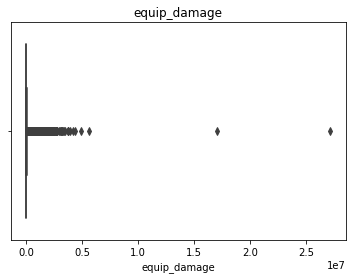

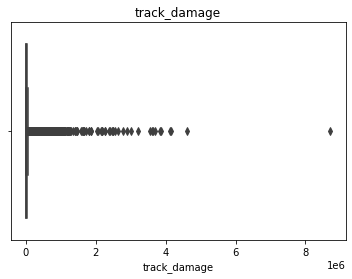

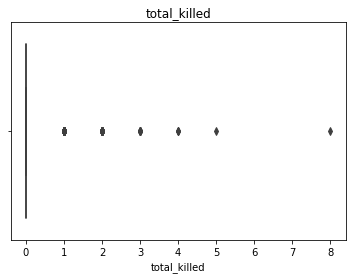

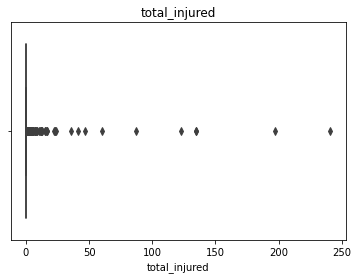

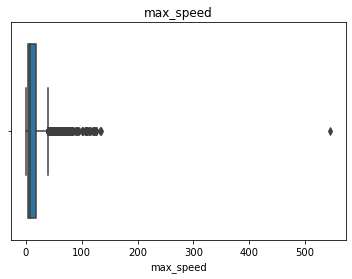

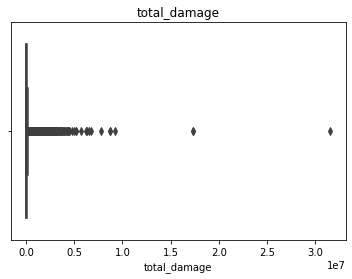

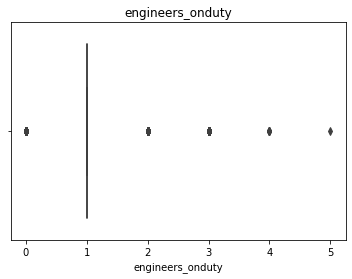

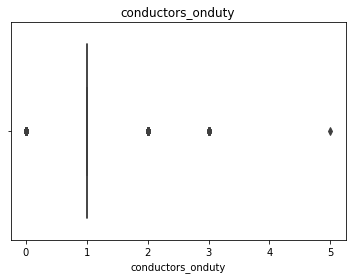

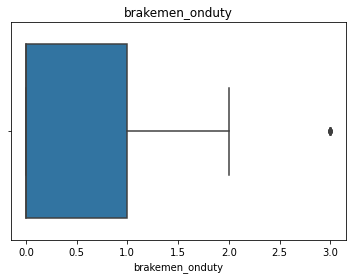

In [12]:
visualize_outliers(df)

**Takeaways:**
   - Need to investigate outliers in:
        - max_speed & train speed...one over 500 mph
        - train weight
        - one super negative temp

**Split the Data**

In [13]:
train, validate, test = explore.train_validate_test_split(df, 'railroad_company', seed=444)
print(f'Train Shape: {train.shape}')
print(f'Validate Shape: {validate.shape}')
print(f'Test Shape: {test.shape}')

Train Shape: (5908, 37)
Validate Shape: (2532, 37)
Test Shape: (2110, 37)


**Is there a time of year where rail equipment accidents happen with more or less frequency?**

In [14]:
train['month'] = pd.DatetimeIndex(train['date']).month
train.head()

,state_fips,railroad_company,accident_type,state_x,temp,visibility,weather,train_speed,train_direction,train_weight,...,typrr,lat,long,signal_type,date,season,state_y,state,year,month
incdtno,,,,,,,,,,,,,,,,,,,,,
137746,18,NS,1,18,31,1,1,25,3.0,4983,...,1,41.655046,-87.445042,1,2020-04-16 06:18:00,Spring,22,LA,2020,4
0220RM030,32,UP,1,32,49,4,1,4,3.0,3163,...,1,36.278014,-115.067228,2,2020-02-25 23:15:00,Winter,36,NY,2020,2
1112RS011,6,UP,7,6,48,4,1,47,1.0,6595,...,1,37.312292,-120.51840200000001,1,2012-11-20 02:44:00,Fall,9,CT,2012,11
PR0617117,8,BNSF,1,8,95,2,1,24,1.0,4665,...,1,40.016766,-105.20873,2,2017-06-20 16:16:00,Summer,11,DC,2017,6
172025,13,CSX,1,13,78,2,1,3,2.0,0,...,1,33.984567999999996,-83.34025,2,2017-10-04 11:00:00,Fall,17,IL,2017,10


<AxesSubplot:>

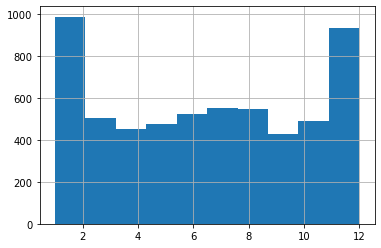

In [15]:
train.month.hist()

In [16]:
train['season'] = train.month.apply(lambda x: "winter/fall" if x == 10 or 11 == 12 or x == 1 or x == 2 or x == 3 else "summer/spring")
train.head()
        

,state_fips,railroad_company,accident_type,state_x,temp,visibility,weather,train_speed,train_direction,train_weight,...,typrr,lat,long,signal_type,date,season,state_y,state,year,month
incdtno,,,,,,,,,,,,,,,,,,,,,
137746,18,NS,1,18,31,1,1,25,3.0,4983,...,1,41.655046,-87.445042,1,2020-04-16 06:18:00,summer/spring,22,LA,2020,4
0220RM030,32,UP,1,32,49,4,1,4,3.0,3163,...,1,36.278014,-115.067228,2,2020-02-25 23:15:00,winter/fall,36,NY,2020,2
1112RS011,6,UP,7,6,48,4,1,47,1.0,6595,...,1,37.312292,-120.51840200000001,1,2012-11-20 02:44:00,summer/spring,9,CT,2012,11
PR0617117,8,BNSF,1,8,95,2,1,24,1.0,4665,...,1,40.016766,-105.20873,2,2017-06-20 16:16:00,summer/spring,11,DC,2017,6
172025,13,CSX,1,13,78,2,1,3,2.0,0,...,1,33.984567999999996,-83.34025,2,2017-10-04 11:00:00,winter/fall,17,IL,2017,10


<AxesSubplot:>

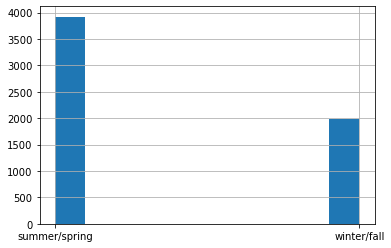

In [17]:
train.season.hist()

**Takeaways:**
- Rail equipment accidents appear to happen more frequently in summer/spring months than in winter/fall months 

**What is the distribution of track damages?**

<AxesSubplot:>

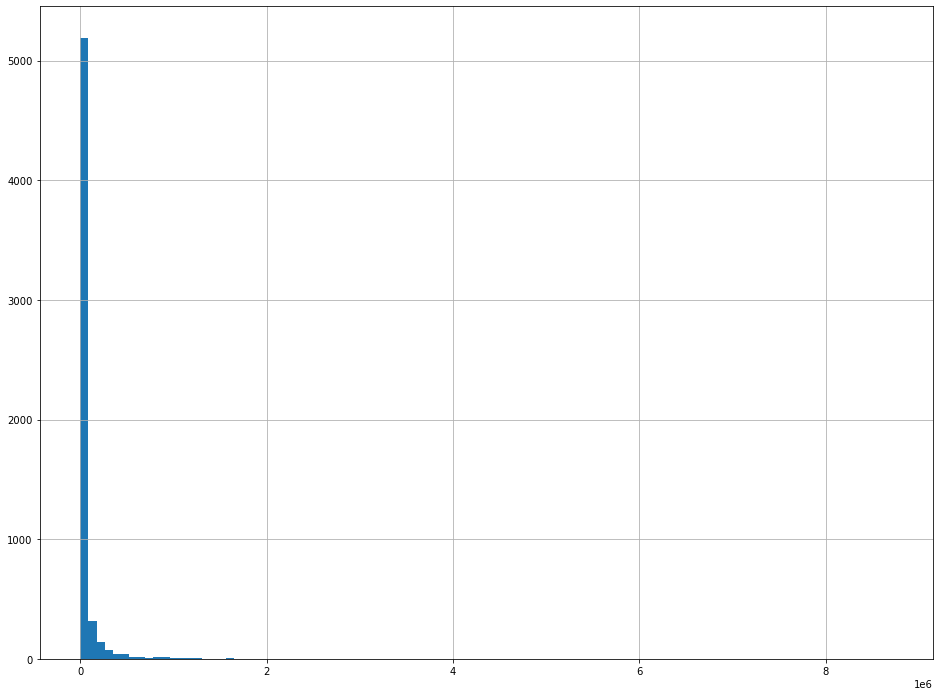

In [18]:
plt.figure(figsize=(16,12))
train.track_damage.hist(bins=100)

---

**Explore Bivariate**

In [19]:
def explore_bivariate(train, target, cat_vars, quant_vars):
    for cat in cat_vars:
        explore_bivariate_categorical(train, 'railroad_company', cat)
    for quant in quant_vars:
        explore_bivariate_quant(train, 'railroad_company', quant)


### Univariate

def explore_univariate_categorical(train, cat_var):
    '''
    takes in a dataframe and a categorical variable and returns
    a frequency table and barplot of the frequencies. 
    '''
    frequency_table = freq_table(train, cat_var)
    plt.figure(figsize=(2,2))
    sns.barplot(x=cat_var, y='Count', data=frequency_table, color='white', edgecolor='grey')
    plt.title(cat_var)
    plt.show()
    print(frequency_table)

def explore_univariate_quant(train, quant_var):
    '''
    takes in a dataframe and a quantitative variable and returns
    descriptive stats table, histogram, and boxplot of the distributions. 
    '''
    descriptive_stats = train[quant_var].describe()
    plt.figure(figsize=(8,2))

    p = plt.subplot(1, 2, 1)
    p = plt.hist(train[quant_var], color='white', edgecolor='grey')
    p = plt.title(quant_var)

    # second plot: box plot
    p = plt.subplot(1, 2, 2)
    p = plt.boxplot(train[quant_var])
    p = plt.title(quant_var)
    return p, descriptive_stats
    
def freq_table(train, cat_var):
    '''
    for a given categorical variable, compute the frequency count and percent split
    and return a dataframe of those values along with the different classes. 
    '''
    class_labels = list(train[cat_var].unique())

    frequency_table = (
        pd.DataFrame({cat_var: class_labels,
                      'Count': train[cat_var].value_counts(normalize=False), 
                      'Percent': round(train[cat_var].value_counts(normalize=True)*100,2)}
                    )
    )
    return frequency_table


#### Bivariate

def explore_bivariate_categorical(train, target, cat_var):
    '''
    takes in categorical variable and binary target variable, 
    returns a crosstab of frequencies
    runs a chi-square test for the proportions
    and creates a barplot, adding a horizontal line of the overall rate of the target. 
    '''
    print(cat_var, "\n_____________________\n")
    ct = pd.crosstab(train[cat_var], train[target], margins=True)
    chi2_summary, observed, expected = run_chi2(train, cat_var, target)
   # p = plot_cat_by_target(train, target, cat_var)
    
    print(chi2_summary)
    print("\nobserved:\n", ct)
    print("\nexpected:\n", expected)
    #plt.show(p)
    print("\n_____________________\n")

def explore_bivariate_quant(train, target, quant_var):
    '''
    descriptive stats by each target class. 
    compare means across 2 target groups 
    boxenplot of target x quant
    swarmplot of target x quant
    '''
    print(quant_var, "\n____________________\n")
    descriptive_stats = train.groupby(target)[quant_var].describe()
    average = train[quant_var].mean()
    mann_whitney = compare_means(train, target, quant_var)
    plt.figure(figsize=(4,4))
    boxen = plot_boxen(train, target, quant_var)
    swarm = plot_swarm(train, target, quant_var)
    plt.show()
    print(descriptive_stats, "\n")
    print("\nMann-Whitney Test:\n", mann_whitney)
    print("\n____________________\n")

## Bivariate Categorical

def run_chi2(train, cat_var, target):
    observed = pd.crosstab(train[cat_var], train[target])
    chi2, p, degf, expected = stats.chi2_contingency(observed)
    chi2_summary = pd.DataFrame({'chi2': [chi2], 'p-value': [p], 
                                 'degrees of freedom': [degf]})
    expected = pd.DataFrame(expected)
    return chi2_summary, observed, expected

#def plot_cat_by_target(train, target, cat_var):
#    p = plt.figure(figsize=(2,2))
#    p = sns.barplot(cat_var, target, data=train, alpha=.8, color='lightseagreen')
#    overall_rate = train[target].mean()
#    p = plt.axhline(overall_rate, ls='--', color='gray')
#    return p
    

## Bivariate Quant

def plot_swarm(train, target, quant_var):
    average = train[quant_var].mean()
    p = sns.swarmplot(data=train, x=target, y=quant_var, color='lightgray')
    p = plt.title(quant_var)
    p = plt.axhline(average, ls='--', color='black')
    return p

def plot_boxen(train, target, quant_var):
    average = train[quant_var].mean()
    p = sns.boxenplot(data=train, x=target, y=quant_var, color='lightseagreen')
    p = plt.title(quant_var)
    p = plt.axhline(average, ls='--', color='black')
    return p

# alt_hyp = ‘two-sided’, ‘less’, ‘greater’

def compare_means(train, target, quant_var, alt_hyp='two-sided'):
    x = train[train[target]==0][quant_var]
    y = train[train[target]==1][quant_var]
    return stats.mannwhitneyu(x, y, use_continuity=True, alternative=alt_hyp)

In [20]:
#Breakdown the features by categories for Univariate and Bivariate Functions from Explore Module
categorical_target = 'railroad_company'
cat_vars = ["train_type", "cause", "typrr"]
quant_vars = ["accident_type", "state", "temp", "visibility", "weather", "train_speed", "train_direction", 
             "train_weight", "equip_damage", "track_damage"]

train_type 
_____________________

          chi2  p-value  degrees of freedom
0  4873.975653      0.0                  40

observed:
 railroad_company  ATK  BNSF  CSX   NS    UP   All
train_type                                       
1                   0   835  448  509  1313  3105
2                 267     1    0    0     0   268
3                   2     0    0    0     0     2
4                   5     4    3    6    21    39
5                   0     5   16    3    29    53
6                   1    18   58   15    10   102
7                  33   576  212  295   746  1862
8                  40   106   16   49   131   342
9                   1    30    2    0     3    36
A                   9    10    2    6    38    65
B                  33     1    0    0     0    34
All               391  1586  757  883  2291  5908

expected:
              0           1           2           3            4
0   205.493399  833.535884  397.847833  464.068213  1204.054672
1    17.736628   71.94448

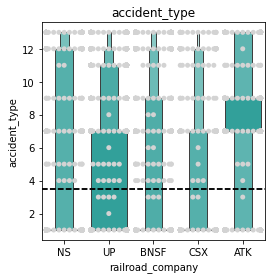

                   count      mean       std  min  25%  50%  75%   max
railroad_company                                                      
ATK                391.0  7.255754  4.144946  1.0  7.0  7.0  9.0  13.0
BNSF              1586.0  2.988651  3.971332  1.0  1.0  1.0  1.0  13.0
CSX                757.0  2.760898  3.535108  1.0  1.0  1.0  1.0  13.0
NS                 883.0  3.169875  4.082555  1.0  1.0  1.0  1.0  13.0
UP                2291.0  3.581405  4.162505  1.0  1.0  1.0  7.0  13.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=0.0, pvalue=0.0)

____________________

state 
____________________



TypeError: Could not convert  LA NY CT DC IL SC MA CT RI CO LA KS MI NH LA WV KY MO NH IL NH CO WV MA MD MD MA MA MS LA VT CA WA CT WV LA IL CO MD PA WV OK MO NM TN SD CT WV TN NJ MS MD SC CO ME MD ME AK CT IL RI IL UT TN CO OK KY AK RI CO CA AK MD WV OH NE NM WV NV WV KY WA NH CT SC KY KY KY NM KY ME IL CT NM IL VT MT SD MD WV KY KY TN MI NE WV MI NY SD WV CO OK DC ME WA ID OK WV RI OH SC CT IL MA OR RI NM CT KY LA CO SC CT AK MA WV CT IL WV MS WV MI NH RI WA WV KY SD IL KY NE SD CT WA CT RI CO KY CO WI CT TN LA OH NJ CT WV MD CT RI WV WV KY NE ND CO OR CT WV SC WV OR MI ND CT CT AK CO NH DC NE IL GA ME ID WV NH OR KS WV WI KY NE NY AK SC AK TN DC WV NJ GA NM NM KS CT IL CO TN NM CO IL ND GA WV KY IL NJ MI TN NH CO TN WV PA MD MI NM WV CA CA OR SC CT DC CT IL DC NV NE NE WV ME DC LA KY MA WV AK CO RI OK CT WV LA OH RI KY ME WV IL WV KY TN PA NM RI KY TN NE CO CA OR ID PA OR DC LA IL RI RI KY CO CT NM NM ND OK SC WV DC TN DC IL WV NM MO WV KY WV KS NM NH WV WA WV VT OK MD KY MD OR MA NJ NE CT KY NM WV KY CT SD DC MI VA KY RI MI SC KY AK NY IL WV CA WV WV VT MS CT WV RI DC OH KY WV WV CT ME KY KY ME KS NH NM OR KY WV RI CT KS AK KY KY SC AK NH SD TN NM NH WV NM OK PA PA MS KS KY MA MI NH CT NM MD CA NM CT TN IL SC CT SC KS CT MS WV AK AK NM IL ID MD WV GA NE RI ME ID WV OK WV WV KS CT NM RI KS MI KY WI WV AK WV WA NH TN DC DC KS WV ID SC MA WV ME OK WV MI CT WV TN AK CT KY WV WA CT LA CA WA KY WV MD OH LA IL NM FL WV AK NE NY SC KY WV NE CT WV IL MS NH OH WV KY MS WV NJ MD NE SC DC KY NE WV NH TN CT CT WV CA WV CT OK NJ DC IL CT AK MD WV SC NM NE KY CO DC IL RI ID ID LA CT WV KY KY WV TN RI KY DC ID KY ND SC WV NH WV OH CT RI AK IL MD CT NH WV WV TN ID KY NE NV IL OK KS WV DC WV WV IL NH WV WV CT WV CT WV MT LA CT NH NM KY CO WV MA CA IL OK IL ME WV OH NE NM SC CT WV NH NM OR KS WV CT WV DC DC TN MI MA CT MD LA CT DC RI DC WV CT WV WV CT ID PA KY TN NJ WV NM CO MT WV WV WV WV ID WV WV WV NM CA CO MS MD MI KY FL CT LA NE DC KY TN VT KY CT NM CA CO WV MT OK LA LA RI SC NM SC DC WV CA CT DC VT CT RI NJ IL ME OH WA TN KY NM CT MD CT MS NM MS AK KY MI AK NH RI CT AK WV WA WV IL MS MD MI CT RI OR CT TN WV KY MA CT ND NJ KY KY TN CO VA NM WV AK ID KY WV IL KY WV VT WV WV NJ NJ WV DC NE VT NM IL KY WV NH ME WV OK NJ NJ SC AK KY MD OK SC NY WV CO OH LA MI WV TN TN WV NH CO WV AK NE WV CT ME CO WV IL NE VT DC OH KY MD RI WV NM MA IL WV KY IL KY NH OR NJ WA WA NM PA NV LA KY KS KY WV WA KY KY MD PA KY CO CT WV CO KS WV CO NV NE TN MI KY WV ID ME OK AK WV WV KY DC SC CT TN NV RI TN KY TN OK PA IL CT CT MS NE CT AK NM SC MD MI KY MD NM MD MD ID CO NM WV CO WI CO RI WV ME WV NM IL MD KY ME ME NH NM MI NM IL PA MD DC NM IL AK ID WV WV NM CO WV DC AK KY CO IL ME LA MO WA WV NH NM DC NJ WV WA OK SD NY CT WI NE CT KY ME TN CA OR CA AK NE KY CO KY WV WV TN WV NE NH KS IL KY WV CO CA WV AK WV RI WY CT TN RI KY NE MD MI CO DC LA NH KY NJ MO NE MD VT WV LA LA CO ME SD OK ME ME WI KY RI SC WV WV MI NH MI OR WV ME MI MD WA CT NE WV VA NJ WV VT CT WV IL WV NH KY WA MS WA WV NE WA KY CT NM AK MA NE WV CA SC MD CO WV CT KY MI CT NH WV NE CT TN NE AK ME NM ID MA VT AK OK HI WV DC TN KY DC WV NJ KY WA IL HI RI KS LA WV WI OK OK CA TN CT LA NM NM OK SC RI NM CT SC OK DC CA CA NH WV ME CO MI IL KY SD IL TN NH TN WV MD KY WV RI WA WV AK OH WV NM NM DC MI IL MS CT CT WI KY CT MD WI NM SC KY KY SC NY CT ID WI WV OR WV CO MI WV ME RI NM VT VT MI CT WV IL HI WV SC RI AK KY RI MD WV WV WV WV MI KY WV LA TN WV NM WV SC TN OH NM DC ME SC ID OR WI CT LA CT KY WI WA NJ SD WV OK MD NE MD WA LA OR CO KY ID KY ME ND CT MD DC WV MD CA WV WV CO IL CA WI DC NH CT VT KY KY ME OK LA CA CT SD MD NH ME CT OR WV CT OH TN NM NV TN WV WV OK CT VT OR WV CT OK WV CO CA AK WV MS DC WV NJ KS KY NH KS RI CT CT AK KY NV WV KY MA WV KY KY TN KY PA ID CA CT LA MD LA MD NM KY WV KY WA KY NH NM MI WV IL MS WV WV TN MS NV MA OK IL IL KY ME MI WV OK NH NH WV NE KY WV KY WI NY ME RI PA MI WV MT KY CO OR WV KY OR KY TN NJ WV NM NE NM KY CT ID CT MD NE GA SC ME MI RI WV ME NM WV NM WV OK MA TN MS MD IL KS RI KS CT WI WV IL WV ME WI CA MI OH NM KY WV GA KY KS WA CT NJ LA NH RI TN WV KY ID RI ND WV KY NV CT TN LA WI PA SD KY WV MI LA TN OH MO CA WV LA WI NH NM NH NE KS LA CA NM TN MD CT WV OR WA KS CT CT NM TN KY CO CA SC ND CA AK KY TN NM KY MI WV CO WV WV WV MA HI RI NM ME TN WV CT MS NM ID KY WV KY ME WV WV NM WV WV NH WV MD LA WA CO NM MS TN OR DC VT DC RI SC CO FL SC WV WV MD NM DC WV SC WV TN CT NM SD CT WA MI WA AK NM AK MO IL MS OR WV SC NM WV RI MD WV ME KY MA IL WV KY NM WI MD SC SD WV LA TN NM IL WV WA WV SC CO DC DC AK MS LA KY CO LA KY KY MI RI OR MD ME MI MI KS CT NM NJ NH CO KY RI MD NJ PA IL MA WV WA WV ND WV MS MA LA MD MA NM SD MA NM IL WV CT WV TN KY CO SD TN SD VT CA CT LA SC WI CT CA IL PA NM MT WV CT WV ND NY NM TN SC LA NM CT WV LA WV NY AK NE TN WV WV NE NJ SD VT CT IL CT NM RI WV OH WA IL AK RI ME LA MD WV VT CT ID WV ME NV MD MD CO AK WI OK AK CT LA VT OH MD NE OH KY WV OK KY KY TN CO DC DC IL MD NE MA ME WA MD WV CO WV LA KY SC IL NM WV WV WV WV MI KY CT WV WV WV MA NE MI WV CT KY WV NJ IL WA ID NJ CT WV KY NM NM ME WV CT ID ME NE SC CT WV NY NM WV WV NH TN NM MS MI WI MA KY WI ID ME WV CT IL RI WA ND KS WV LA RI RI KY WV ND ME KY NM KY NJ KY KY LA WV LA IL TN NH SC WA KY IL CT IL WI CT WV SC GA RI KY MD IL OR SC NH MD NE KY KY WV NM MD CT ID IL KY NM TN WV WA CT WV KY WV WV CT ID KS KY ME OK CT CT WV SC VA ME WV ME MA NM NM CT TN KY CO CT RI NH MA KY LA HI NM KY WV KY AK RI OR NH AK IL WV ME MD SC OK IL MD OR CT OK KY WV SD NH WV NM ME KY HI LA WV IL KY WV NM MI IL TN WV IL OR OH WV NM OK OH LA NM WV KY WV KY NJ VT ME VT KY CA SD AK NM WV NH NH MS ME WV RI NM OK TN KY AK AK WA MD TN MA NE MA SD OH LA MD CT AK NH NE CT CT NH RI WV NY WV WV WV CT SC LA KY RI DC KY CT WA OR PA CT KY NM LA NE WV AK OH ID SC LA ME MI RI WI SC WV WV NJ KY ND WV OK ME KY WV AK NM LA NM WV NM NM NM CT KY MI NE KY KY WV TN CA OR GA WV NY WV ID NE MA WV IL WA VA NH TN NE CT IL KY WV IL OK AK VA WV VT NM WV LA NY WV CO MA OH SC WI MI WV VA OR MI TN AK NM MD CT KY CT OH WV WV CO KY KY NE WV NH KY CT OK LA KY CT MT NH DC CO IL WV LA NE KY NE PA NE WV MA AK AK CT KY WI WV FL KY OH CT WV AK WA MI NM KY MI WV NH HI AK NE WV KY IL WV KY SD KY RI NE CT HI CT RI SD IL SC WV WV RI KY LA NE ME WA WV WV MA SC CT WV TN NM SC MS RI CA OR WV IL OH LA NM WA MD DC NH RI NE CT KY SC OH ND CT WV NM LA CT WV NY WV WV WV DC MA WA NY WV WV ID TN WV TN LA WV DC AK OH WV NM KY CO NJ WV TN CT CT IL PA CT CT CO ND CT IL WV NM WI KY IL OR SC RI ID OH IL CT IL TN IL AK MD GA KS WV WV KY WA NJ KY WV NV OR OR WV CT NH NH ME MD RI DC MI KY ME VT VT LA RI WV NH CO TN WA NE NH VA NJ SC WA CT MI AK IL KY WA TN LA CT NM CT NM RI WV NE MI WV LA WV RI KY LA NM WV RI MD WV WV WV NH DC WV LA WV CT RI AK NH MT WV NM WV ID TN TN NE CO NH MO CT MD WV MD CT HI RI AK WV MD KY SC CO WV KS WV SD NM MD CT WA CT WV WV WV LA KY KY WA NM MO MD VT OK WV MD MD ME KY MI KY MD WV KY WI KS WV KY WV KY OH TN KS CA KY WV CT CT ID NH NM KY MS KY MT MI NH ID KY LA KY WV WV KY RI WV SC NH OK MS KY KS KY MI OR OR CA NJ PA KY DC IL SD SC KY AK TN KY NJ ME RI DC ID AK WV TN NM TN ID CT WV OR IL LA WA CT WV WV KY WA MA NV KY MI WV MD KY NM KS NJ KS CT WI MI AK WI KS NM LA MT NE WV GA DC RI AK MS KY OK SD RI WV WV NH VA KY GA MI WA NM NE WV ME NM NM MD IL OH WV IL OR WV MO OH WV SC ID LA DC WV NM CT KY WI PA KS MD OR WV MD OR KY WI PA DC MD NH KS NY NM OK CT WV WV OR KY SC WI IL CT VT WV ID NE SC MD NM NM KY OH MD NH KS OH LA OH CO AK OK ME MD CT PA ND WV WV TN CT IL VT CA FL MD WV NJ DC WV MI CT VT WA WA OK WV CO LA WV KY WV DC NM NM OK IL VT NH WV RI NE MI CT WV NH ME WV DC CT CO IL OK KY KY MD NY NE KY IL LA MI NH DC WV NH WI MI WV RI NM NM SC MI LA CO NH NH KY MS OH OK MD WI WV AK CT MA NM WV WA WV NM AK AK SC AK WV WV LA WV CO DC WV RI CT WV OH NM MD CT AK NM WV OK LA WV WV SD DC ME WV KY WV OK SC WV DC WV RI DC NM KY CO TN WV TN NM DC IL OH WV OR WV SC WV OR LA PA WV SD NM ID SC VA WV SD TN CT CT ID RI WV DC MI NM WV NM MD MD CO SC WV WV WV CT WV WV IL WV HI VT ND MD CA CT VT NH KY KY DC MS WV NC GA WV OH WV WV VT KY MA AK NH MT ID SD KY AK OK SD KY OR WV NM NC MD LA CO WV TN NH WV WV WV WV MD WA CT KY PA WV WV CO WV CO RI CO WV OH WV DC CA WV OH MI NM KY NM LA IL SC CO KY TN MT OH TN MI OK KY WV VT NE SC WV WV NE WV CT KY NE NE KY NH SD WV SD MT NM LA KY CO FL WV WV MS AK SC PA KY TN NE WA CO ND MI CT WA UT SD MA WI KY CT MO CT RI IL LA KY ND KY OK MD OK WV SD DC WA WV DC AK WA KY DC KY WA MI OH KS PA WV LA NM NM SD KY ID MI CT TN CT KY CT VT NM NY NM SC WV NE OH AK KS KY NH LA ND CT WI OR CT KY WV OK RI IL NH CT AK IL AK NM WY AK IL CT RI OR OK IL RI CT KY IL AK WV NH KY NE WV NM CT CT NE IL IL LA NM OK KY MT ME MD AK WV KY TN KY NM IL CT WA AK KY KY MA WV CT DC SC KS NV VT CT SD CT RI NY OR WV IL DC KY NH LA WI VA KY NH MI WV GA VT NY MA NY WA WV ME CT RI NH NJ NM WA SD NE WV NE CO KY WV NH WV IL NM CO KY RI DC NJ CT WV NM WV CT WA WV NM WV ID CT IL WA WV KY MD RI WV KY WA SC WA IL WV TN NM NM KY PA CO NH SD WV IL ME TN ME NE OR PA AK LA CT MD NJ WV ND FL WV CO DC WV DC NH ID TN WV ID WV KY MA OR AK WA MD AK AK CT NE WV KY NM DC MI WV NM WV OK MD NM OK WA KY MA HI WV NJ KY CT WV CO OK MI NJ OH MI WV KY ME WA GA RI KY AK OH MT KY WV MI SC WV ME MD WA CT CT DC SC KS MI WV IL MS WV IL WV WV CT DC CT WI SC OR WV KY WA MI NH NH WA KY IL VT NJ ME KY MA CT NH NM WV WV OK OR AK NJ RI MD AK KY WV OR CT WV MD NV MS WV PA ME CA SC SD CT CT CA LA WV MI WV WV DC NE TN CT WA KY WA IL CT WV ME IL NH WV CO NM OK CA WA MS ME AK DC RI ME WV AK MD NE WV MI KY RI NH WV NM WV AK KY SD NM MO NM KY CO KY WI AK CO NM ID VT CT NM AK KY NJ HI WV WV MT CO NM SD ID CO NJ KY WV WV WV MI SC TN KY CA WA NH OK AK RI WV ME MD WV KY OK TN NE ME KY SC KY LA RI ME IL MI ME ND RI CT KY CT MI KY ME MD RI KY MO NM NM TN DC WV OH ME NH NM WV WV NJ CA WV CT CA VT LA NY SC CO MS AK WV RI WA VT MD WV NM AK OH OK MI KY OH MD IL CT AK NM NE CT NE WV WV TN MD WI IL WA KY KY MI CO WV IL RI WV OK KY CT OK MD KS CT KY MD IL KY MD CO CT MS WV OH TN IL MI SC RI VT CT NE ND KY KY NM NM MD NH VT MT AK ND OR WV OR WI NE CO SC CT WV AK CT KY KY LA WV CO OH MA NM WV ME KY CO IL OR CT NH KY CT NM LA ND SD CT VT KY WV MD MI LA CT KY OR AK KY SC MD NJ IL OR NH SC CA VA RI NH RI TN CT CO NE AK VA CT SC NY CT KY TN WV NJ CT WA WV WA RI KY CT CT WI CO CT NH ME MD CT NM NH CA WI AK CA NE FL IL WV MD MS NE WV MI NE NV NM DC CO WV CT IL MT LA SC KY KY MS NH WV WV MD WV MD CT WV WA WV ME ME KY MD MI KY WI WI WV WV LA ME MD WV WV HI WV WV TN MS AK MD PA CT PA KY WV RI CT WI MD NM NH NE SD NM CT OH VT WV CT ME RI NM MI SD WV CT WV KY AK WV AK WV SD DC ME RI KY AK TN ID KY ME ME KY WV ID WV NJ WV WV NM KY TN OR MI MD LA HI PA NY NE NE MD WV WV SC CA OH CT WV WV WV WA KY WV WA NH WV MA WA NH WV CT CT CT WV TN CT MS MI WA KY ME WV CT CT MD SD WV MA NH KY DC SC RI IL ME OK WV CT NY NM MD WV CO SD NE CT VT ME IL MO MT NJ WV AK MA KY CT IL SC RI SC CT ME LA CA NM CO WV WV AK AK SC WV NH RI MA MA RI OH CT NM SC NM MA SC ND PA MD DC WV PA NE PA IL CO ME WV RI MI ME WV MI NV WV CO HI DC TN KY WV SC CO KY WV CT WA NH WV MD LA LA ID CT CT WY DC KY AK WV WV ME NM CT NE WA NE WV NH VT MO KS WA ID TN WV RI MO TN WV SD CT WV WV SD MI CT WV OH OH NY NM NM WV MD MO WI MD CT OH TN KY KY MD NM WI DC MI WV WV OK DC ME PA OK MS OR WV VA NM ID CA CT KY AK KY ME VA NM WV CT SC MS WV KY NM CA WV WV MT NM CA PA PA WV OH NY WV SC WA NM IL WV NV CO ND KY MA SC OH CT CT CT WV NJ OK CT CT ME DC CT RI DC RI NH MD WV SC NH NM SD LA WV NV CO TN LA KY OH NM MD ID DC RI KY WV SC NH CA KY KS WV WA MD AK WV KY NM MA VT NE NM WV NM LA WV MS MI WV KS ID NH SC ME NH NM WV VT HI CO WV NH WV ME LA WV NJ CT VA OH NM OK ME NY OK CA KY WV KY ME TN IL MD KY CT OH KY CT NM RI KY WV NH CT WV WV CO OR MD CT NH RI SC NH CT WV KY OK SC DC LA ME KY KY AK VT WV AK NE RI KY RI WV IL KY WA CT WV KY NM NM DC SC CT MA OK TN ME SC NM WV NM CO CT SC CO AK WA CA ME NM NH RI IL KY CT DC LA WV MA DC CO WV DC WV WV WV KY OR NH NJ CT WI WV KY WV WV LA CT DC KY ME RI NH OR SC NE MI OK TN RI CT MD MT WV VT ME RI CA DC IL WA MT RI CT MS RI WV NH MD CO DC LA MS TN MD NM FL WV CT CO NM WV CO CT WV WV RI PA CT IL CA CO CT CT CO MA ME CT RI NY MD WA KY NH NH NM RI OH AK NH NE CT TN WA MI LA KS NV SC MI IL SC MI RI CO NY CO CT MI OH KY TN CO CT WV CT WV OR KY WV WV TN WV NH NM WV MD CT NH WV WV MI CA LA KY CT SC WV WV MD CT KY WV WV TN VT CT OH VT DC KY WV WI MD WA FL NM SD WV MD ID WI WV IL TN NM MA KY AK WV CT AK WA CT WV NE CA WV WV AK CO WV WA TN TN IL CT NH GA NH RI ID KY IL IL VA NH ID RI KY IL KY WV MD SC RI MA WV IL KY HI AK NE NH DC RI SC WV NM NE CA WV CT WA WA KY MD SC KY KS WA MI ME CT CT RI LA MD TN TN WV RI MD CO RI NM KY WV NH KY TN ME CT WV OK RI WV RI NH NH OR LA KY LA NE OK ME CT PA IL CT WV LA CO KY KY WV RI MD DC NE NM TN WV RI KY TN OK KY IL MA OH KY OK NH IL RI OR OK RI MD WV MI CT MD MI MD DC WA OR SC NM AK WV WV DC WV ME MD NM ME MD NE RI WV MD NH VA NM MD NJ TN KY VT ME VT OK AK MD ME CT CO OK MS AK CT SC LA NM WV NM CT WV MS OR SC CT WA LA WV TN MD NH KY KY MD KY KY WV WA TN AK OR WV MA OR WV NE PA SC KY KY WA SD DC CT NV KY NV WV WI IL WA WI DC KY SC ND CT WV WI ID MS ID WV NH TN WV NM OK KS CT AK WV MS NE NE LA IL OH CT MI IL WV MI FL WV WV VT CT MA WV CT WA WA SC WV WV ME LA WV NE WI MS MD ID KY WV SC NM CT WV IL VT TN LA NM AK WA WA MD NE DC WV KY WV IL NV DC LA OR ME IL LA IL NM ME MI WV CT KY AK CO IL NE MI WV WV MD NE NM DC OK TN RI MI VT NE KY TN AK CO TN PA WV KY IL ME DC VT NH SD CO MI SD NH KY ME WV WA TN CO AK UT CT OR IL LA CA WV SC WV NV KY AK NH ME CT DC MI TN SD NJ MI OH WV ID MT ID RI ID NH CO CT WA MI CT LA DC MD MA MA KY WA RI DC KY NM MA NH LA CA OK MI VT LA OR IL WI CT IL KY NM MI SC MD RI WV IL WV KS RI CT CO CT OH NH CO KY KY DC RI ID WV TN OR NH LA CT WV WV NE WV PA IL DC WV NH WV KY ME RI MN OR NM OH NM KS MI MD OK MA WV MD NE MD NH MI OH CT NM OK ME WV KY LA NH WA PA IL KY LA CT TN NE WV MO VT NJ ID ME NM ND CT WV KY KY NH NV DC ME KY MD WV CT WV WI TN MI ME LA NE SC KY KY KY WV MI WV KY NM WV SC NM WV MD NM MI NH CT OK ME WV KY KY TN WV MS MD KY NM VA CA RI NH KY SC WV IL GA KY SC NH NE OH IL LA NM CT SC WV NJ MI NM WA WV TN KY AK WV OH KY WV ME NY WV WV TN MD WV MI NH WA KS ME MI LA OH LA NM WV IL WV WV CO VT WV MI OH CO RI NM NH MD SC GA NM MO MI NH KY KY WA TN TN WI KY KY TN ME KY MO WI LA NH CT CT LA WV SC CA CT OH NH WV IL CT NM IL LA OR ME NE IL CT WV IL KY KY WV CT CT LA CO OK HI OR CT WV WV WI WI MD HI NM WV LA NC VT WI NM AK NH IL NM ME IL TN NM WV IL ME KY WV KY MA NH WI IL RI AK LA MI WV CT LA TN CT IL ID NM MA ME WV CT AK NH TN KY IL KY WI RI KY MI OR NM NM AK NM CA NM NH WA KS NM MI ME CO WV DC OR WV CT TN NJ RI SC SC KY OK KY WV WV NE CA AK WV NE WV ME OK WV WV AK DC NM NE SD IL WV LA IL LA LA NE WV WV SC LA NE WV ME TN NH RI TN DC ME NM TN MS IL UT SD IL AK WA CT CT FL NH VT VT KY KY ME NM MA WV TN TN RI RI TN WV RI WV KY KY CT WV RI CT AK KY SC OR KY DC CO TN TN SC KY ND OH NM RI NV KY MI WV NH KY WA WV OR WV WV CT NH WV LA NM SD LA MD NM KY KY WV KY ME ID VT MD NM WI OK LA WA KY SC SC MA NM NH AK NE NM WV LA WI KY ME WV WA KY CT LA ME CT VA NJ WV WV NV MD SD CO NJ ME KY CT AK WV AK CT CT WA WV NM WI WV WV WV KY KS SC MA VT WV MD NM KY ME DC NM MI DC WV LA WI NV WV NY ID KS WV CT KY WV CT CT HI LA WA OH NE MI WV WV CO CA WV CO NH KY CA TN HI WV KY MD CA WA NE NM SC KY PA WV NM TN KY KY NE CT MI MD CT NJ VT MA MD CT MI WV ME CT NM MD CA CT NH NM WV OK NJ WV KS RI DC NJ CT NJ WV KY NJ CT IL KY KY CT SC MD NM AK NM DC AK CT TN DC PA OH WV WV AK RI NM KY CT CT AK MD OK ME NH OK TN RI NH WA CT AK CT CT TN MI IL DC OH ME MD CT CO WV NM KY KY RI WV WV OH FL MD IL ME ID WV OH SD SC SC MS KY IL LA MS ND WV NV WV WI WV NM WA NM SC TN OK WV WV CT MD CO OK NM KY WA MI NH MA OR RI ME ID TN CT WA RI NM NE AK MI WI NM RI WV NV KY WV OK KY MD CT SD MD CT WA NH OR NY WV NM NJ NM NM WV KY SC NM KY SC NE KY CT WV NH NM RI NM NH OR HI SD ME MA MD WA NM WV MS MT OR WV CT NM IL RI AK NM MD AK WV MS WV VT MD PA SC LA OR CT WV MD MI AK NH CA MS CT CO WA WI RI WV AK WV MI OK TN RI NM KY RI RI CO WV NM ND MI OH OR CT NH MI NY WV TN ME CT WA NH AK NH LA WV NV ID KY CT NM SC WV SD NM NH ID OK WV WV KY KY NH WA IL NM NJ WV NV WV OK NH DC SD WV IL UT WV SC WV KY CT MI RI CT KY RI WV MS WV KS WV WV CT KY RI OK NH KY CO DC TN SC LA NV TN NM CA ME WV LA WV MI LA ME KY MT WV NH WV NE OR AK KY TN NY ID CA DC TN MA VT WV NM NM LA GA ME CT VA KY WV NJ WV NH IL NM ME LA KY OK WV CT WV KY CT ME WV OK MI WI KY DC NM SD WV MS RI SD NH WV MD NE NH VA DC CT NV KY ME MI NY GA NM DC CT IL NE OH WV MA CT NE NE CA ME VT KY CT VT KY IL NE IL WV OR CT LA NH WV WV CT IL WV IL WV KY NM NM CT WV TN IL LA MA KS WV CO TN NH SC KY WV HI WV NM MS TN MD WV MO DC LA CT SC LA WI CT MA OH NH WV NH MO WV CO NM NM KY WV KY KY CT MS SD MI CT OK WV CT DC LA NY KY CA MI WV KY CO CO NH CT NJ NE WV ND MD CO CA MS WV CT NH NM NM CT WV NJ CA CO MI NM WV MS MA CO CA KY NH MA ID CT WV TN WV HI AK CT CO SD WV KY ID MD WV ID CT NE WV RI ME WV ID ME SD LA MD MI ME ND AK AK LA NH AK NM KY WV KY ME CT KY NE CO TN WV ME WV WA KY WV ME KY ME WV NJ HI AK NM NE TN ID KS RI MI MD NH OR RI KY WV KY TN NH NJ CT MT WV SC WV CT WV NJ PA SD MO AK GA WV AK CT KY ME NJ NM CT WI WI NH MA AK NH MD MA KY KY SD ME CO CT WV SD DC MD RI MI RI NH PA MO LA WV RI WA IL WV RI KY WV OK NH NM CT DC CA WA WA LA CT LA RI OR WV WV IL MT RI KY WV ME KY WV WV MD IL WV MS MS MI WV VT LA WV CT NM DC WV NM IL NE OR CT CA MI LA CT IL KY AK ME RI ME WV AK WV CT TN MI WV ME CT MD KY HI KY AK NE CT WV ME NM CO NM OH IL DC NE WA KY WV WV WV CA DC SC KS WV WV MD NY KS PA MI NM RI HI ME ME TN MD RI WV DC NY RI RI NM KY NM OK CT LA CT WV OK DC WV NH DC WV AK NM ME WV WV WV OK WA RI RI CO WV CA OH VT MA ME AK NE MD TN MI AK CT WV MD WV WI CT ME AK WV NH AK WV WV CT NE CT PA KY SC NM WV RI MA MD KS ME WV OK OR ID WV IL to numeric

In [21]:
explore_bivariate(train, 'railroad_company', cat_vars, quant_vars)

**How do total damages compare by railroad?**

<AxesSubplot:xlabel='railroad_company'>

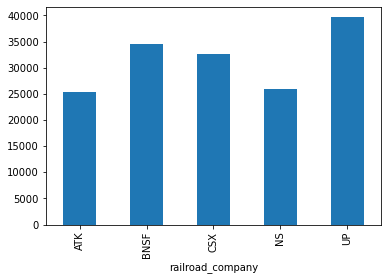

In [22]:
train.groupby('railroad_company').total_damage.median().plot(kind='bar')

**Takeaways:**
   - UP equipment accidents result in higher median total damages
   - Temperature spread is varied by railroad...Is this beacuse certain railroads operate in more specific climates?
   - Accident type should be a categorical value
   - Amtrak trains travel at higher speeds than other Railroads
   - BNSF accidents seem to incur > track damages on average
   - Amtrak incidents are missing train weight data

---

**Equipment Multivariate Exploration**

TypeError: 'value' must be an instance of str or bytes, not a int

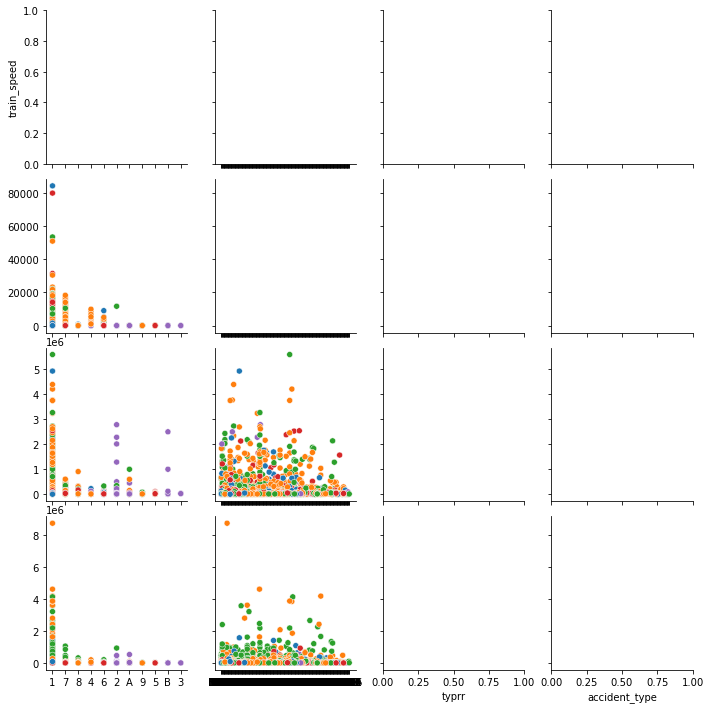

In [23]:
sns.pairplot(data = train, hue = 'railroad_company', 
             x_vars = ["train_type", "cause", "typrr", "accident_type"],
             y_vars = ["train_speed","train_weight", "equip_damage", "track_damage"])

**Takeaways**
   - Amtrak trains go faster than non amtrck trains.
   - Pairplot seems to confer that BNSF equipment accidents result in > track damages. 

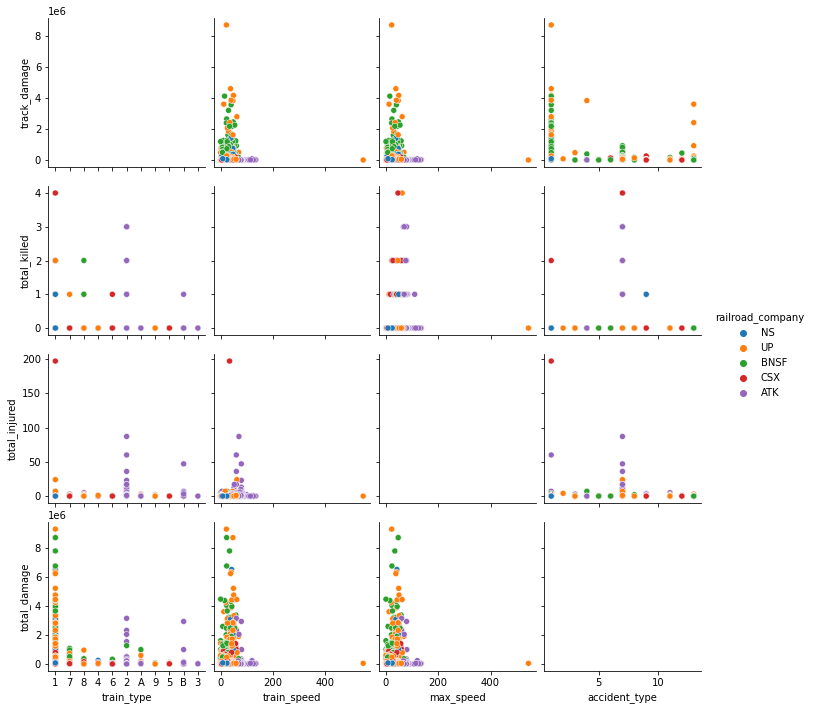

In [24]:
sns.pairplot(data = train, hue = 'railroad_company', 
             x_vars = ["train_type", "train_speed",
                        "max_speed", "accident_type"],
             y_vars = ["track_damage","total_killed", "total_injured", "total_damage"])

**Takeaways:**
   - Amtrak seems to be the exception for the observation that the > the train speed, the > the track damage.
   - Conversely, the greater the train speed for an Amtrak train, the > total_injured
   - Equipment rail incidents result in higher rates of injuries than in deaths

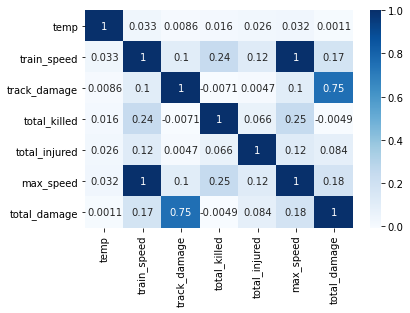

In [25]:
sns.heatmap(train[["temp", "train_speed","track_damage","total_killed", "total_injured", "max_speed", "total_damage"]].corr(), cmap='Blues', annot=True)
plt.show()

**Takeaways**
   - The most interesting thing here is that total_injured is fairly correlated with total_damaged

## Questions from Exploration to Explore With Statistical Testing

**Do Amtrak Equipment Incidents Result in Higher Track Damages than other Railroad Equipment Incidents?**

I am using a mann-whitney u test to analyze this due to the fact that track_damage is not normally distirbuted<br>
**H<sub>o</sub>: Amtrack equipment accidents do not result in higher track damages than other Railroad equipment accidents.<br>
H<sub>a</sub>: Amtrack equipment accidents do result in higher track damages**

In [26]:
#Set confidence interval and alpha for Mann-Whitney U Test due to the fact that track_damage is not normally dist
confidence_interval = 0.95
a = 1 - confidence_interval 

#Define the two samples where x1 is Amtrak Railroad accidents and x2 non-Amtrak railroad accidents
x1 = train[train.railroad_company == 'ATK'].track_damage
x2 = train[train.railroad_company != 'ATK'].track_damage

#Run the test
t, p = stats.mannwhitneyu(x1, x2)

#print results
print(f'The mannwhitneyu statistic is:{t} and the p-value is {p}')

if p < a:
    print('We reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis')

The mannwhitneyu statistic is:492989.5 and the p-value is 1.7926555300583217e-73
We reject the null hypothesis.


**Do Amtrak Equipment Incidents Result in Higher Total Damages than other Railroad Equipment Incidents?**

I am using a mann-whitney u test to analyze this due to the fact that total_damage is not normally distirbuted<br>
**H<sub>o</sub>: Amtrack equipment accidents do not result in higher total damages than other Railroad equipment accidents.<br>
H<sub>a</sub>: Amtrack equipment accidents do result in higher total damages**

In [27]:
#Set confidence interval and alpha for Mann-Whitney U Test due to the fact that total_damage is not normally dist
confidence_interval = 0.95
a = 1 - confidence_interval 

#Define the two samples where x1 is Amtrak Railroad accidents and x2 non-Amtrak railroad accidents
x1 = train[train.railroad_company == 'ATK'].total_damage
x2 = train[train.railroad_company != 'ATK'].total_damage

#Run the test
t, p = stats.mannwhitneyu(x1, x2)

#print results
print(f'The mannwhitneyu statistic is:{t} and the p-value is {p}')

if p < a:
    print('We reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis')

The mannwhitneyu statistic is:914650.5 and the p-value is 2.4576764750804274e-07
We reject the null hypothesis.


**Is train_speed a effective feature for classifying railroad involved in an equipment accident?**

In [28]:
#Set confidence interval and alpha for Mann-Whitney U Test due to the fact that total_damage is not normally dist
confidence_interval = 0.95
a = 1 - confidence_interval 

#Define the two samples where x1 is Amtrak Railroad accidents and x2 non-Amtrak railroad accidents
x1 = train[train.railroad_company == 'ATK'].train_speed
x2 = train[train.railroad_company != 'ATK'].train_speed

#Run the test
t, p = stats.mannwhitneyu(x1, x2)

#print results
print(f'The mannwhitneyu statistic is:{t} and the p-value is {p}')

if p < a:
    print('We reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis')

The mannwhitneyu statistic is:510092.0 and the p-value is 8.379487149604707e-69
We reject the null hypothesis.


**Is train_type related to railroad?**

Chi Squared Test for examining the relationship between two categorical variables<br>
**H<sub>o</sub>: Train type is independent of railroad.<br>
H<sub>a</sub>: Train type has dependent on railroad.**

In [29]:
observed = pd.crosstab(train.railroad_company, train.train_type)
observed

train_type,1,2,3,4,5,6,7,8,9,A,B
railroad_company,,,,,,,,,,,
ATK,0,267,2,5,0,1,33,40,1,9,33
BNSF,835,1,0,4,5,18,576,106,30,10,1
CSX,448,0,0,3,16,58,212,16,2,2,0
NS,509,0,0,6,3,15,295,49,0,6,0
UP,1313,0,0,21,29,10,746,131,3,38,0


In [30]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[   0  267    2    5    0    1   33   40    1    9   33]
 [ 835    1    0    4    5   18  576  106   30   10    1]
 [ 448    0    0    3   16   58  212   16    2    2    0]
 [ 509    0    0    6    3   15  295   49    0    6    0]
 [1313    0    0   21   29   10  746  131    3   38    0]]
---
Expected

[[2.05493399e+02 1.77366283e+01 1.32362898e-01 2.58107651e+00
  3.50761679e+00 6.75050779e+00 1.23229858e+02 2.26340555e+01
  2.38253216e+00 4.30179418e+00 2.25016926e+00]
 [8.33535884e+02 7.19444821e+01 5.36899120e-01 1.04695328e+01
  1.42278267e+01 2.73818551e+01 4.99853081e+02 9.18097495e+01
  9.66418416e+00 1.74492214e+01 9.12728504e+00]
 [3.97847833e+02 3.43392011e+01 2.56262695e-01 4.99712255e+00
  6.79096141e+00 1.30693974e+01 2.38580569e+02 4.38209208e+01
  4.61272850e+00 8.32853758e+00 4.35646581e+00]
 [4.64068213e+02 4.00548409e+01 2.98916723e-01 5.82887610e+00
  7.92129316e+00 1.52447529e+01 2.78291469e+02 5.11147596e+01
  5.38050102e+00 9.71479350e+00 5.08158429e+0

**Takeaway:**
- The chi squared test revealed there is likely a significant relationship between the type of train and the railroad.
- Type of train would be a good feature for predicting railroad company, but it may result in too much coliniarity

---

**What features should be carried over to modeling for Equipment Rail Accidents?**

**Rail Equipment Univariate Takeaways & Questions:**
- Outlier in train speed? What train travels at 545 mph?
- What is going on with the State column? Expected 50 but shows 56. Are the 6 extra representing terratories in the US?
- Track Damages and Equip damages have outliers which is expected  
- What does signal feature mean? The majority of the equip accidents are classified as not signaled...but what does that actually mean?

# Step 4: Modeling - Rail Equipment

> **Approach:**
>
> ...

In [31]:
#Acquire the Data
df = acquire.get_equiprail()
df.shape

(22402, 146)

In [32]:
#Prepare the data
df = prepare.prep_equip_df(df)
df.shape

(10550, 37)

In [33]:
equip_df = df[['track_damage', 'total_damage', 'weather', 'equip_damage', 'railroad_company']]
equip_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10550 entries, GC0512102 to 137065
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   track_damage      10550 non-null  int64 
 1   total_damage      10550 non-null  int64 
 2   weather           10550 non-null  int64 
 3   equip_damage      10550 non-null  int64 
 4   railroad_company  10550 non-null  object
dtypes: int64(4), object(1)
memory usage: 494.5+ KB


In [34]:
#Split the Data
train, validate, X_train, y_train, X_validate, y_validate, X_test, y_test = preprocessing.train_validate_test(equip_df, 'railroad_company')

In [35]:
X_train.shape

(5908, 4)

In [36]:
y_train.shape

(5908,)

In [37]:
object_cols = preprocessing.get_object_cols(equip_df)
numeric_cols = preprocessing.get_numeric_X_cols(X_train, object_cols)

In [38]:
#X_train_scaled, X_validate_scaled, X_test_scaled = preprocessing.min_max_scale(X_train, X_validate, X_test, numeric_cols)

In [39]:
def min_max_scale(X_train, X_validate, X_test, numeric_cols):
    '''
    this function takes in 3 dataframes with the same columns, 
    a list of numeric column names (because the scaler can only work with numeric columns),
    and fits a min-max scaler to the first dataframe and transforms all
    3 dataframes using that scaler. 
    it returns 3 dataframes with the same column names and scaled values. 
    '''
    # create the scaler object and fit it to X_train (i.e. identify min and max)
    # if copy = false, inplace row normalization happens and avoids a copy (if the input is already a numpy array).

    scaler = sklearn.preprocessing.MinMaxScaler()
    scaler.fit(X_train[numeric_cols])

    #scale X_train, X_validate, X_test using the mins and maxes stored in the scaler derived from X_train. 
    # 
    X_train_scaled_array = scaler.transform(X_train[numeric_cols])
    X_validate_scaled_array = scaler.transform(X_validate[numeric_cols])
    X_test_scaled_array = scaler.transform(X_test[numeric_cols])

    # convert arrays to dataframes
    X_train_scaled = pd.DataFrame(X_train_scaled_array, 
                                  columns=numeric_cols).\
                                  set_index([X_train.index.values])

    X_validate_scaled = pd.DataFrame(X_validate_scaled_array, 
                                     columns=numeric_cols).\
                                     set_index([X_validate.index.values])

    X_test_scaled = pd.DataFrame(X_test_scaled_array, 
                                 columns=numeric_cols).\
                                 set_index([X_test.index.values])

    
    return X_train_scaled, X_validate_scaled, X_test_scaled

In [40]:
X_train_scaled, X_validate_scaled, X_test_scaled = min_max_scale(X_train, X_validate, X_test, numeric_cols)

In [41]:
X_train_scaled

,track_damage,total_damage,weather,equip_damage
124392,0.002771,0.001453,0.0,0.000071
0416HO015,0.000160,0.001685,0.0,0.001646
RD0418125,0.000941,0.003499,0.0,0.003099
CA0413100,0.001515,0.000754,0.0,0.000000
0512PR005,0.000992,0.001399,0.2,0.000926
...,...,...,...,...
0120HL013,0.000008,0.001170,0.0,0.001197
111711,0.012628,0.027468,0.2,0.021600
SF0712112,0.004625,0.002512,0.0,0.000203
NE0312100,0.000402,0.000651,0.0,0.000465


---

In [42]:
df.railroad_company.value_counts()

UP      4090
BNSF    2833
NS      1577
CSX     1352
ATK      698
Name: railroad_company, dtype: int64

In [43]:
print(f'Baseline Accuracy: {round(max(df.railroad_company.value_counts()) / df.shape[0] *100)}%')

Baseline Accuracy: 39%


**Logistic Regression Model**

In [44]:
#Using the scaled data, make a logistic regression model
lm = LogisticRegression()

#Fit the lm object to the vectorized data
lm.fit(X_train_scaled, y_train)

#Create corresponding dataframes 
train = pd.DataFrame(dict(actual=y_train))
validate = pd.DataFrame(dict(actual=y_validate))
test = pd.DataFrame(dict(actual=y_test))

#Form predictions uisng the lm model
train['predicted'] = lm.predict(X_train_scaled)
validate["predicted"] = lm.predict(X_validate_scaled)
test['predicted'] = lm.predict(X_test_scaled)

#Review how the lm model performed on the in-sample data
print('In-sample data model performance:')
print(classification_report(train.actual, train.predicted, zero_division=0))
print('----------------')
#Review how the lm model performed on the out-of-sample data
print('Out-of-sample data model performance:')
print(classification_report(validate.actual, validate.predicted, zero_division=0))

In-sample data model performance:
              precision    recall  f1-score   support

         ATK       0.00      0.00      0.00       377
        BNSF       0.47      0.01      0.01      1578
         CSX       0.00      0.00      0.00       735
          NS       0.00      0.00      0.00       910
          UP       0.39      1.00      0.56      2308

    accuracy                           0.39      5908
   macro avg       0.17      0.20      0.11      5908
weighted avg       0.28      0.39      0.22      5908

----------------
Out-of-sample data model performance:
              precision    recall  f1-score   support

         ATK       0.00      0.00      0.00       177
        BNSF       0.71      0.01      0.01       680
         CSX       0.00      0.00      0.00       332
          NS       0.00      0.00      0.00       360
          UP       0.39      1.00      0.56       983

    accuracy                           0.39      2532
   macro avg       0.22      0.20      0.1

**Takeaways:**
- The LM model does not improve upon the baseline accuracy.
- What does this mean for the features we selected?

---

**KNN**

In [45]:
#Create the KNN object with a k = 7
knn = KNeighborsClassifier(n_neighbors=6, weights='distance')

#Fit the object to the scaled training data
knn.fit(X_train_scaled, y_train)

#Create corresponding dataframes 
train = pd.DataFrame(dict(actual=y_train))
validate = pd.DataFrame(dict(actual=y_validate))
test = pd.DataFrame(dict(actual=y_test))

#Form predictions uisng the knn model
train['predicted'] = knn.predict(X_train_scaled)
validate["predicted"] = knn.predict(X_validate_scaled)

#Review how the knn model performed on the in-sample data
print('In-sample data model performance:')
print(classification_report(train.actual, train.predicted,  zero_division=0))
print('----------------')
#Review how the knn model performed on the out-of-sample data
print('Out-of-sample data model performance:')
print(classification_report(validate.actual, validate.predicted, zero_division=0))

In-sample data model performance:
              precision    recall  f1-score   support

         ATK       0.98      0.99      0.98       377
        BNSF       0.97      0.99      0.98      1578
         CSX       1.00      0.99      0.99       735
          NS       1.00      0.97      0.98       910
          UP       1.00      0.99      1.00      2308

    accuracy                           0.99      5908
   macro avg       0.99      0.99      0.99      5908
weighted avg       0.99      0.99      0.99      5908

----------------
Out-of-sample data model performance:
              precision    recall  f1-score   support

         ATK       0.21      0.15      0.17       177
        BNSF       0.34      0.38      0.35       680
         CSX       0.21      0.17      0.19       332
          NS       0.16      0.13      0.14       360
          UP       0.43      0.48      0.46       983

    accuracy                           0.34      2532
   macro avg       0.27      0.26      0.2

**Takeaways:**
   - Using a K=6 returns the best accuracy score for predicting railroad company
   - Using weights=distance parameter results in overfitting on the train dataset but retains a similar accuracy score on the validate data as the default weights hyperparamter of 'uniform'

---

**Random Forest**

In [46]:
#Create the RF object
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=2,
                            n_estimators=100,
                            max_depth=10, 
                            random_state=123)

#Fit the RF object to the training data
rf.fit(X_train_scaled, y_train)

#Predict on y
y_pred = rf.predict(X_train_scaled)

#Evaluate
print('In-sample data model performance:')
print(classification_report(y_train, y_pred))

In-sample data model performance:
              precision    recall  f1-score   support

         ATK       0.72      0.29      0.42       377
        BNSF       0.59      0.60      0.60      1578
         CSX       0.71      0.32      0.44       735
          NS       0.87      0.18      0.30       910
          UP       0.57      0.90      0.70      2308

    accuracy                           0.60      5908
   macro avg       0.69      0.46      0.49      5908
weighted avg       0.65      0.60      0.56      5908



In [47]:
#Predict using out of sample data
y_pred = rf.predict(X_validate_scaled)
print('----------------')
print('Out-of-sample data model performance:')
print(classification_report(y_validate, y_pred, zero_division=0))

----------------
Out-of-sample data model performance:
              precision    recall  f1-score   support

         ATK       0.32      0.12      0.18       177
        BNSF       0.37      0.38      0.37       680
         CSX       0.40      0.17      0.23       332
          NS       0.39      0.06      0.10       360
          UP       0.45      0.73      0.56       983

    accuracy                           0.42      2532
   macro avg       0.39      0.29      0.29      2532
weighted avg       0.41      0.42      0.38      2532



**Takeaways:**
   - Random Forest achieves the highest accuracy score thus far

---

**Decision Tree Modeling**

In [48]:
#Make the CLF object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=9, random_state=123)

#Fit the model on the training set 
clf = clf.fit(X_train_scaled, y_train)

#Make predictions
y_pred = clf.predict(X_train_scaled)

#Evaluate model performance on training data
print('In-sample data model performance:')
print(classification_report(y_train, y_pred))

In-sample data model performance:
              precision    recall  f1-score   support

         ATK       0.59      0.23      0.33       377
        BNSF       0.44      0.56      0.49      1578
         CSX       0.54      0.24      0.33       735
          NS       0.52      0.17      0.26       910
          UP       0.53      0.72      0.61      2308

    accuracy                           0.50      5908
   macro avg       0.52      0.38      0.41      5908
weighted avg       0.51      0.50      0.47      5908



In [49]:
# Predict on validate
y_pred = clf.predict(X_validate_scaled)

# Evaluate model performance on out-of-sample data
print('Out-of-sample data model performance:')
print(classification_report(y_validate, y_pred, zero_division=0))

Out-of-sample data model performance:
              precision    recall  f1-score   support

         ATK       0.22      0.10      0.13       177
        BNSF       0.34      0.45      0.39       680
         CSX       0.33      0.14      0.19       332
          NS       0.22      0.08      0.12       360
          UP       0.45      0.60      0.52       983

    accuracy                           0.39      2532
   macro avg       0.31      0.27      0.27      2532
weighted avg       0.36      0.39      0.36      2532



**Takeaways:**
   - Random Forest algorithm achieves a 42% accuracy on validate data set
   - The Decision Tree algoithm also performs best at being able to predict the individual railroad companies and this is evident from the precision scores. 

---

**Evaluate on Test**

In [50]:
#Predict on y
y_pred = rf.predict(X_test_scaled)

#Evaluate
print('In-sample data model performance:')
print(classification_report(y_test, y_pred))

In-sample data model performance:
              precision    recall  f1-score   support

         ATK       0.30      0.10      0.15       144
        BNSF       0.39      0.39      0.39       575
         CSX       0.34      0.13      0.19       285
          NS       0.25      0.04      0.07       307
          UP       0.44      0.72      0.54       799

    accuracy                           0.41      2110
   macro avg       0.34      0.28      0.27      2110
weighted avg       0.37      0.41      0.36      2110



### Takeaways:
- The best features for predicting railroad operator were features that were discovered to have collinearity. Features such as Location (State Fips) and Train length were determining characteristics  for the Railroad operators in these samples.

- After removing features that were collinear with the target, the classification models dropped in performance, as expected.

- None of the features selected from exploration greatly improved upon the baseline accuracy models for predicting the railroad operator of a given incident.

---

# Highway Rail Data

# Step 1: Data Acquisition - Highway Rail

In [51]:
#Acquire data using acquire.py module and get_hwyrail function
df = acquire.get_hwyrail()
#Preview the shape of the acquired dataframe 
df.head()

,AMTRAK,IYR,IMO,RAILROAD,INCDTNO,IYR2,IMO2,RR2,INCDTNO2,IYR3,...,NARR1,NARR2,NARR3,NARR4,NARR5,SUBDIV,ROADCOND,VIDEOT,VIDEOU,Unnamed: 103
0,NaN,12,3,UP,0312RS009,NaN,NaN,,,12.0,...,HIEHWAY USER'S ACTIONS: STOPPED ON CROSSING ( NO GATES).,NaN,NaN,NaN,NaN,WOODBRIDGE,B,1,2,NaN
1,NaN,12,3,UP,0312RS025,NaN,NaN,,,12.0,...,HIGHWAY USER'S ACTIONS: STOPPED ON CROSSING ( BEFORE GATES DESCENDED). DRIVER ABANDON ...,D LEFT THE SCENE.,NaN,NaN,NaN,FRESNO SUB,A,1,2,NaN
2,NaN,12,10,BNSF,CA1012201,NaN,NaN,,,12.0,...,DRIVER AGE UNKNOW. 41: ABANDONED VEHICLE,NaN,NaN,NaN,NaN,SAN BERNARDINO,A,1,2,NaN
3,NaN,12,10,BNSF,CA1012202,NaN,NaN,,,12.0,...,"12/18/12 PER CONTRA COSTA COUNTY CORONERS REPORT, MANNER OF DEATH RULED SUICIDE.",NaN,NaN,NaN,NaN,STOCKTON,A,1,1,NaN
4,NaN,12,7,BNSF,CA0712201,NaN,NaN,,,12.0,...,NaN,NaN,NaN,NaN,NaN,STOCKTON,A,1,2,NaN


**Takeaways:**

---

# Step 2: Data Preparation - Highway Rail

> **Our approach:**
    > - The data contained over 100 columns, so we reduced the number of columns.  
    > - We dropped columns with 80% of null values, features not included in this analysis, and duplicated information columns. 
    > - We concatenated the date time values as a datetime object and dropped original columns for date and time. 
    > - We lowercased all column titles and converted latitude and longitude to string dtypes.
    > - We engineered two features, one for season and one for region. 
    > - We created a `prepare.py` module with functions to clean and prepare the data. 

In [52]:
df = prepare.prep_hwy_df(df)
df.shape

(11278, 54)

---

# Step 3: Data Exploration - Highway Rail

> **Our approach:**
    > - Split the data to explore on the training data set
    > - Run univariate, bivariate, and  multivariate visulaizations for how features interact with each other and the target, railroad_company
    > - Run statistical tests to help answer questions that arose from exploration

**Takeaways:**

---

In [53]:
df.shape

(11278, 54)

In [54]:
df.railroad_company.value_counts()

UP      2850
CSX     2600
NS      2481
BNSF    2079
ATK      821
KCS      447
Name: railroad_company, dtype: int64

In [55]:
df.season.value_counts()

Fall      2936
Winter    2880
Summer    2859
Spring    2603
Name: season, dtype: int64

In [56]:
df.state.value_counts()

 WV    1627
 IL     748
 LA     710
 CT     661
 AK     578
 KY     512
 RI     503
 MI     489
 OR     354
 MA     353
 VT     351
 NH     342
 TN     342
 WA     341
 ID     341
 CO     307
 SC     291
 NM     273
 MD     272
 NV     214
 NE     182
 DC     164
 CA     150
 MT     150
 ME     138
 MS     120
 OK     116
 PA     111
 KS     108
 SD      74
 OH      72
 NJ      62
 VA      54
 ND      50
 WI      38
 GA      29
 MO      16
 NY      15
 WY       8
 FL       4
 MN       4
 NC       2
 HI       2
Name: state, dtype: int64

## Takeaways:

 - states like Texas, Georgia, Indiana, Alabama, Ohio rank highest in hwy rail accidents while states in the NE like Vermont, Conneticut & DC are at the very bottom.
     - is this because people in NE are more accustomed to trains and people in middle america don't see them as often?
     - Need to look at state populations and compare average accident (i.e., vermont could have 5 people but 2 accidents while Texas could have 28 million people and 1,000 accidents. need to look at the numbers and compare

Initial hypothesis

 - Rail accidents are more prevelant in southern and middle america
     

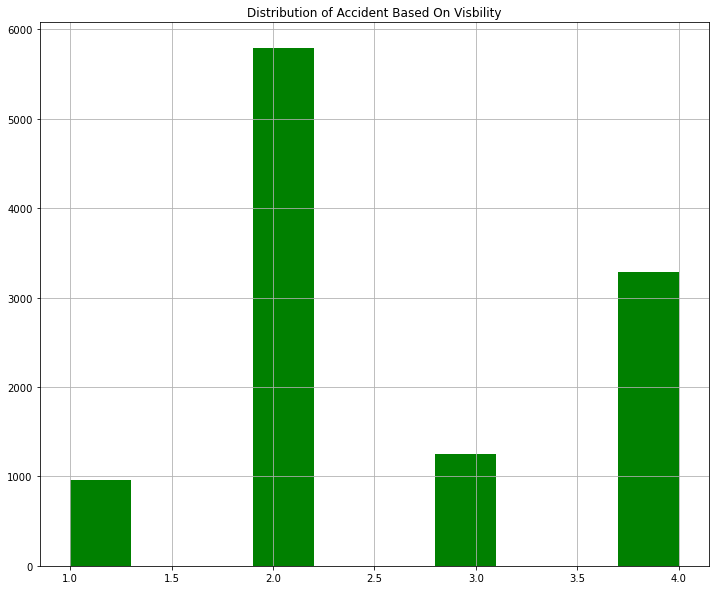

In [57]:
df['visibility'].hist(color='green', figsize=(12, 10))

plt.title('Distribution of Accident Based On Visbility')
plt.show()

----
## Takeaway

Majority of accident happen the day followed by night...not many at dawn or dusk

In [58]:
df.weather = df.weather.astype(int)

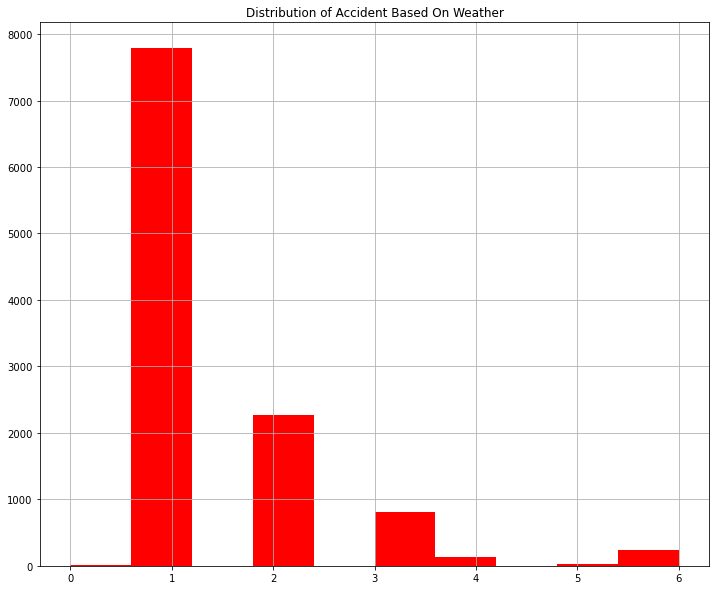

In [59]:
df['weather'].hist(color='red', figsize=(12, 10))

plt.title('Distribution of Accident Based On Weather')
plt.show()

-----

## Takeaway

- Clear weather followed by cloudy skies are when the majority of accidents take place

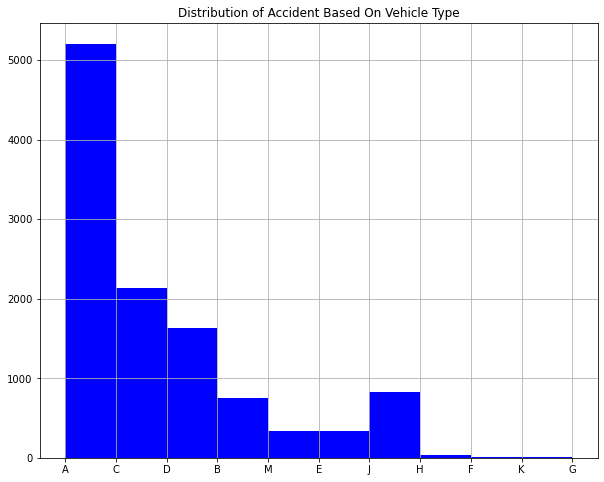

In [60]:
df['vehicle_type'].hist(color='blue', figsize=(10,8))

plt.title('Distribution of Accident Based On Vehicle Type')
plt.show()

In [61]:
df.vehicle_type.value_counts()

A    5207
C    2137
D    1632
J     821
B     749
M     338
E     335
H      37
F      16
G       5
K       1
Name: vehicle_type, dtype: int64


-----
## Takeway
 
 - most accidents are involved with auto(cars) followed by tractor trailers, then pick up trucks. School buses were at the very bottom which was good to see although there were still 5 instances. 

-----------

## OUTLIERS

-------

<AxesSubplot:xlabel='front_engines'>

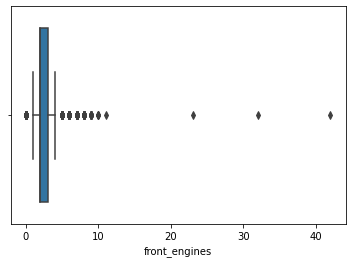

In [62]:
sns.boxplot(data = df, x = 'front_engines')

- Have some crazy outliers with 3 accidents having over 20 engines

<AxesSubplot:xlabel='railcar_quantity'>

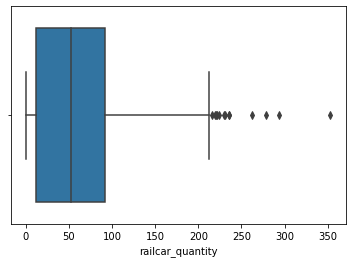

In [63]:
sns.boxplot(data=df, x = 'railcar_quantity')

- majority of railcar quanity is between 0-100 cars but there are some outliers above 200 with one coming in at a whopping 350 cars

<AxesSubplot:xlabel='train_speed'>

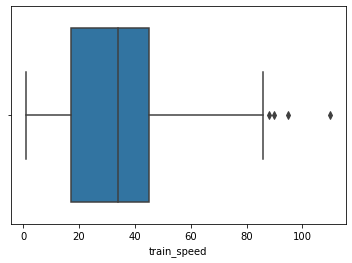

In [64]:
sns.boxplot(data = df, x = 'train_speed')

- train speed outliers above 80 mph, with 2 over 100 mph

<AxesSubplot:xlabel='temp'>

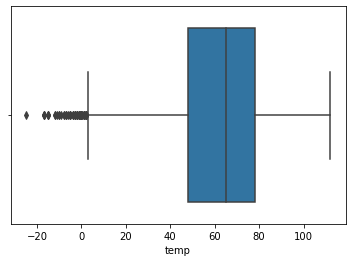

In [65]:
sns.boxplot(data = df, x = 'temp')

- outliers exist for accidents where temp was below 0 degrees with 1 occuring where temp was greater than -20

In [66]:
df.position.value_counts()

3    5248
2    1978
3    1561
1    1469
2     624
1     386
5       5
5       3
4       3
4       1
Name: position, dtype: int64

## Takeaways

- a majority of people involved in accidents were either moving across the crossing when hit or were stopped. A small amount (4 & 5) were either blocked or trapped inside the crossing 

In [67]:
df.road_condtions.value_counts()

A    9419
B    1141
C     392
E     218
D     103
F       5
Name: road_condtions, dtype: int64

## Takeaways

- conditions were dry(A) for a majority of the incidents followed by wet (B) and then snow/slush(C)

In [68]:
df.view_obstruction.value_counts()

8    10929
5       69
3       63
1       63
7       43
2       43
6       42
4       26
Name: view_obstruction, dtype: int64

## Takeaways
- Majority of accidents had zero obstruction while vegetation was next with less than 80 incidents. 

In [69]:
df.motorist_action.value_counts()

3    3924
4    3015
1    1600
5    1561
2     649
7     427
8      79
6      22
0       1
Name: motorist_action, dtype: int64

## Takeaways

- Most motorists did not stop for the train (#3) and were hit or they stopped in the crossing(#4) and were hit. After that, people went around gates (#3). Lower on the list were people who went thru the gates(#7) and then those who attempted or committed suicide (#8)

In [70]:
df.vehicle_type.value_counts()

A    5207
C    2137
D    1632
J     821
B     749
M     338
E     335
H      37
F      16
G       5
K       1
Name: vehicle_type, dtype: int64


-----
## Takeway
 
 - most accidents are involved with auto(cars) followed by tractor trailers, then pick up trucks. School buses were at the very bottom which was good to see although there were still 5 instances. 

In [71]:
df.position.value_counts()

3    5248
2    1978
3    1561
1    1469
2     624
1     386
5       5
5       3
4       3
4       1
Name: position, dtype: int64

## Takeaways

- conditions were dry(A) for a majority of the incidents followed by wet (B) and then snow/slush(C)

In [72]:
df.view_obstruction.value_counts()

8    10929
5       69
3       63
1       63
7       43
2       43
6       42
4       26
Name: view_obstruction, dtype: int64

## Takeaways
- Majority of accidents had zero obstruction while vegetation was next with less than 80 incidents. 

In [73]:
df.motorist_action.value_counts()

3    3924
4    3015
1    1600
5    1561
2     649
7     427
8      79
6      22
0       1
Name: motorist_action, dtype: int64

## Takeaways

- Most motorists did not stop for the train (#3) and were hit or they stopped in the crossing(#4) and were hit. After that, people went around gates (#3). Lower on the list were people who went thru the gates(#7) and then those who attempted or committed suicide (#8)

---------------------------

## Train Data/Bi-Variate/Multi-Variate Exploration

---------------------

In [74]:
from explore import train_validate_test_split, freq_table
from preprocessing import get_object_cols, get_numeric_X_cols

In [75]:
train, validate, test = train_validate_test_split(df, 'railroad_company', seed=123)

In [76]:
train.shape, validate.shape, test.shape

((6315, 54), (2707, 54), (2256, 54))

In [77]:
train.groupby('railroad_company').railcar_quantity.median()

railroad_company
ATK      7.0
BNSF    70.0
CSX     51.0
KCS     60.0
NS      42.0
UP      74.5
Name: railcar_quantity, dtype: float64

## Takeaway

- UP has largest median railcar length followed by BNSF. Amtrack is smallest at 7 but this is because they are strictly passenger 

In [78]:
train.groupby('railroad_company').train_speed.median()

railroad_company
ATK     65.0
BNSF    36.0
CSX     29.0
KCS     33.0
NS      28.0
UP      35.0
Name: train_speed, dtype: float64

## Takeaway

- Median speed across the cargo carriers was no greater than 35 mph and no less than 28 mph. Amtrak was fastest with a median of 65 mph

<AxesSubplot:xlabel='weather', ylabel='Count'>

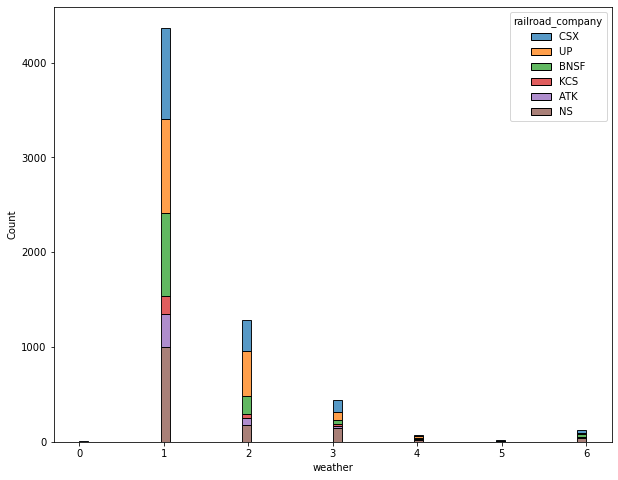

In [79]:
plt.figure(figsize=(10,8))
sns.histplot(data=train, x="weather", hue = "railroad_company", multiple="stack")

In [80]:
train.groupby('railroad_company').weather.value_counts()

railroad_company  weather
ATK               1           347
                  2            71
                  3            29
                  6             9
                  4             4
BNSF              1           875
                  2           197
                  3            47
                  6            27
                  4            15
                  5             3
CSX               1           959
                  2           326
                  3           119
                  6            29
                  4            11
                  0             7
                  5             5
KCS               1           193
                  2            42
                  3            15
NS                1          1001
                  2           175
                  3           142
                  6            45
                  4            22
                  5             4
UP                1           993
                  2   

## Takeaways

- KCS had no reported hwy rail accidents in snow (#6) or sleet (#5) condtions
- BNSF had the third higest total (practically a tie with 2nd (CSX) of snow accidents even though they are 4 out of 6 in total accidents)

In [81]:
train.groupby(['railroad_company', 'weather']).vehicle_damage.max()

railroad_company  weather
ATK               1           150000.0
                  2            60000.0
                  3            60000.0
                  4            22000.0
                  6            10000.0
BNSF              1           140000.0
                  2            20000.0
                  3             6000.0
                  4             5000.0
                  5             2500.0
                  6            10000.0
CSX               0            12000.0
                  1           500000.0
                  2           276000.0
                  3            45000.0
                  4            15500.0
                  5            27500.0
                  6            20500.0
KCS               1            70000.0
                  2            50000.0
                  3            40000.0
NS                1          1000000.0
                  2            70000.0
                  3            50000.0
                  4            28000.0

## Takeaways

- UP had the highest max property damage in Fog with $100,000 while CSX was the winner with a max in the cloudy department. 

In [82]:
train.groupby(['railroad_company', 'season']).vehicle_damage.median()

railroad_company  season
ATK               Fall      7250.0
                  Spring    5000.0
                  Summer    6370.0
                  Winter    6698.5
BNSF              Fall      2000.0
                  Spring    2000.0
                  Summer    2000.0
                  Winter    2000.0
CSX               Fall      6500.0
                  Spring    6500.0
                  Summer    6500.0
                  Winter    6500.0
KCS               Fall      4000.0
                  Spring    5000.0
                  Summer    7900.0
                  Winter    7600.0
NS                Fall      3500.0
                  Spring    3000.0
                  Summer    4000.0
                  Winter    3000.0
UP                Fall      5000.0
                  Spring    5000.0
                  Summer    5000.0
                  Winter    5000.0
Name: vehicle_damage, dtype: float64

## Takeaways

- Median damages seems to be fairly similar on a median basis when spread through each company basaed on the seasons

In [83]:
train.groupby(['railroad_company', 'season']).vehicle_damage.max()

railroad_company  season
ATK               Fall        80000.0
                  Spring     150000.0
                  Summer      75000.0
                  Winter      90000.0
BNSF              Fall       140000.0
                  Spring      20000.0
                  Summer      30000.0
                  Winter      20000.0
CSX               Fall       100000.0
                  Spring     120000.0
                  Summer     276000.0
                  Winter     500000.0
KCS               Fall        40000.0
                  Spring      50000.0
                  Summer      64000.0
                  Winter      70000.0
NS                Fall       400000.0
                  Spring     100000.0
                  Summer    1000000.0
                  Winter      60000.0
UP                Fall       250000.0
                  Spring     250000.0
                  Summer     665000.0
                  Winter     200000.0
Name: vehicle_damage, dtype: float64

## Takeaways

- UP saw its biggest property damage in summer as did NS. 
- CSX had a tie for Winter & Spring as its most expensive damage incidents
- KCS saw an uptick in Summer

<AxesSubplot:xlabel='railroad_company,season'>

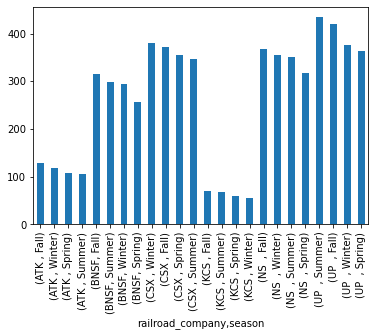

In [84]:
train.groupby('railroad_company').season.value_counts().plot(kind='bar')

In [85]:
train.groupby('railroad_company').vehicle_damage.sum()

railroad_company
ATK      5083164.0
BNSF     3055725.0
CSX     12583141.0
KCS      2461070.0
NS      11090191.0
UP      18140380.0
Name: vehicle_damage, dtype: float64

## Takeaways

- Amtrak, a passenger carrier, had a higher vehicle property damage than BNSF and KCS
- UP leads the pack followed by CSX and NS

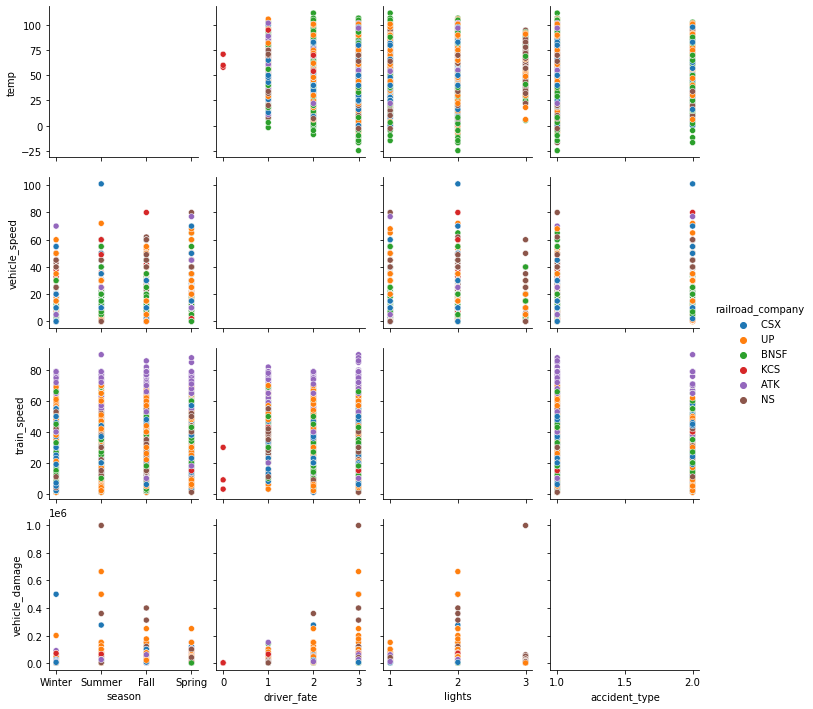

In [86]:
sns.pairplot(data = train, hue = 'railroad_company', 
             x_vars = ["season", "driver_fate", "lights", "accident_type"],
             y_vars = ["temp","vehicle_speed", "train_speed", "vehicle_damage"])

## Takeaways

- Crossings with no lights seem to have a higher frequency of incidents
- Summer is when a larger majority of incidents resulting in damages take place
- The temperature is almost always above 0 when fatal accidents occur

In [87]:
train.groupby('railroad_company').lights.value_counts()

railroad_company  lights
ATK               2          349
                  1          107
                  3            4
BNSF              2          861
                  1          278
                  3           25
CSX               2          910
                  1          545
                  3            1
KCS               2          243
                  1            7
NS                2          946
                  1          331
                  3          112
UP                2         1064
                  1          482
                  3           50
Name: lights, dtype: int64

Text(0.5, 1.0, 'Railroad & Vehicle Property Damage Comparison')

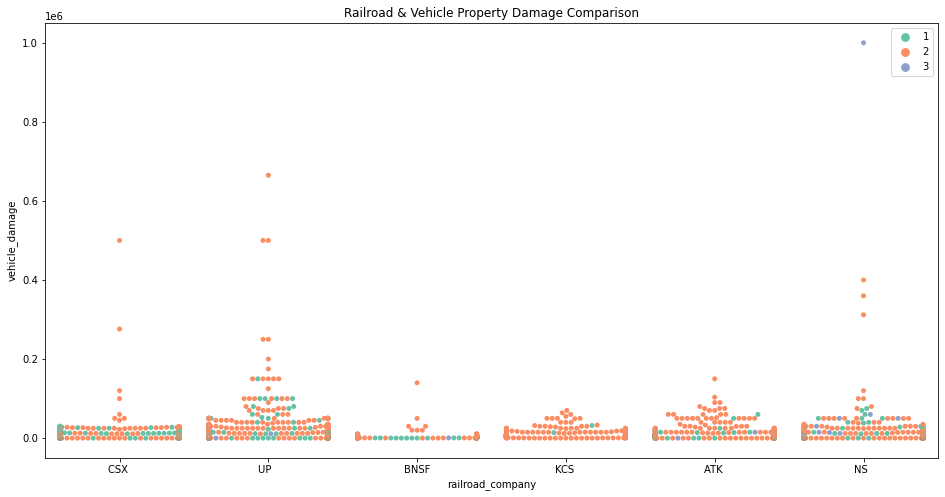

In [88]:
plt.figure(figsize=(16,8))
sns.swarmplot(x="railroad_company", y="vehicle_damage", data=train, hue="lights", palette="Set2")
plt.legend()
plt.title('Railroad & Vehicle Property Damage Comparison')

Text(0.5, 1.0, 'Railroad & Railcar Quantity Comparison by Driver Fate')

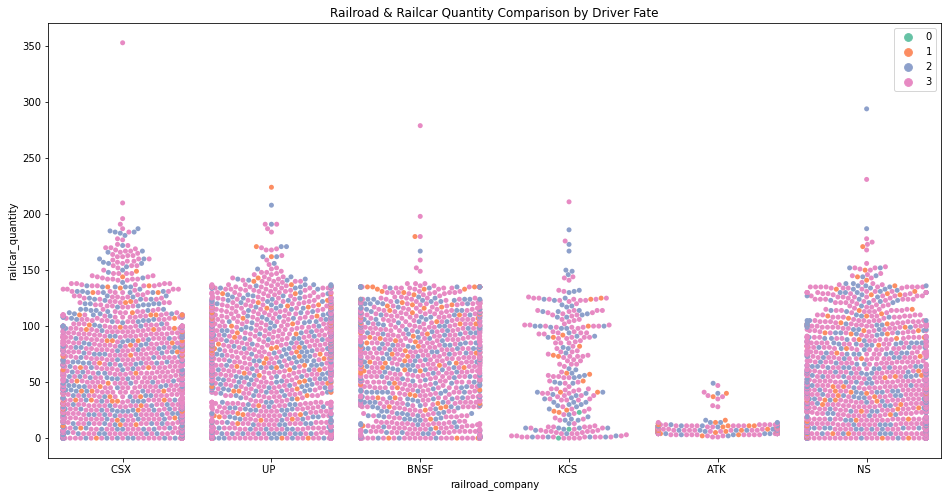

In [123]:
plt.figure(figsize=(16,8))
sns.swarmplot(x="railroad_company", y="railcar_quantity", data=train, hue="driver_fate", palette="Set2")
plt.legend()
plt.title('Railroad & Railcar Quantity Comparison by Driver Fate')

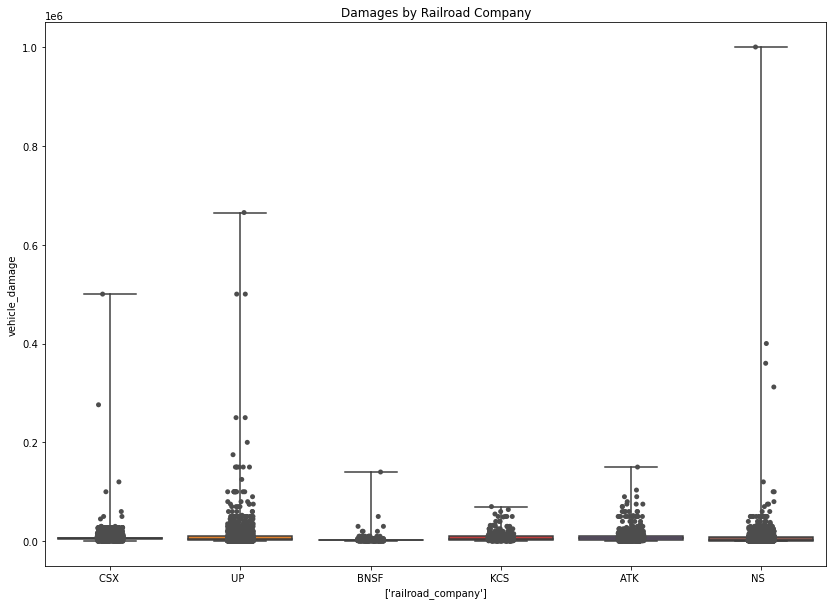

In [89]:

plt.figure(figsize=(14,10))



ax = sns.boxplot(x="railroad_company", y="vehicle_damage", data=train,whis=np.inf )
ax = sns.stripplot(x="railroad_company", y="vehicle_damage", data=train, color=".3")
ax.set_xlabel(['railroad_company'])
plt.title('Damages by Railroad Company')


plt.show()

## Takeaways

- Union Pacific appears to have the most incidents above 100,000 dollars in damages 
- KCS appears to have a concentration of incidents with damages less than 90,000 dollars
- Outliers needs to be dealt with

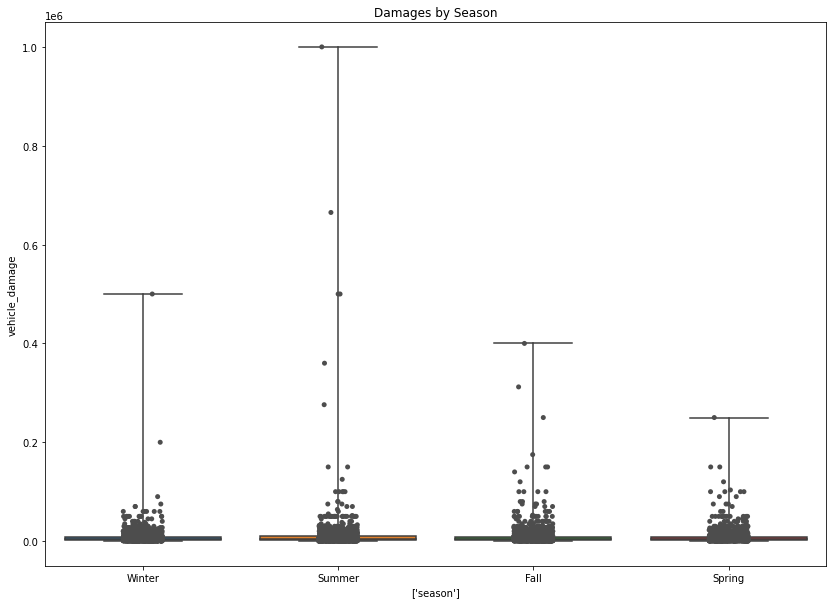

In [90]:

plt.figure(figsize=(14,10))



ax = sns.boxplot(x="season", y="vehicle_damage", data=train,whis=np.inf )
ax = sns.stripplot(x="season", y="vehicle_damage", data=train, color=".3")
ax.set_xlabel(['season'])
plt.title('Damages by Season')


plt.show()

## Takeaways

- Summer is an expensive month
- The other months appear to be more even but we would need to get rid of outliers to get a better visual representation

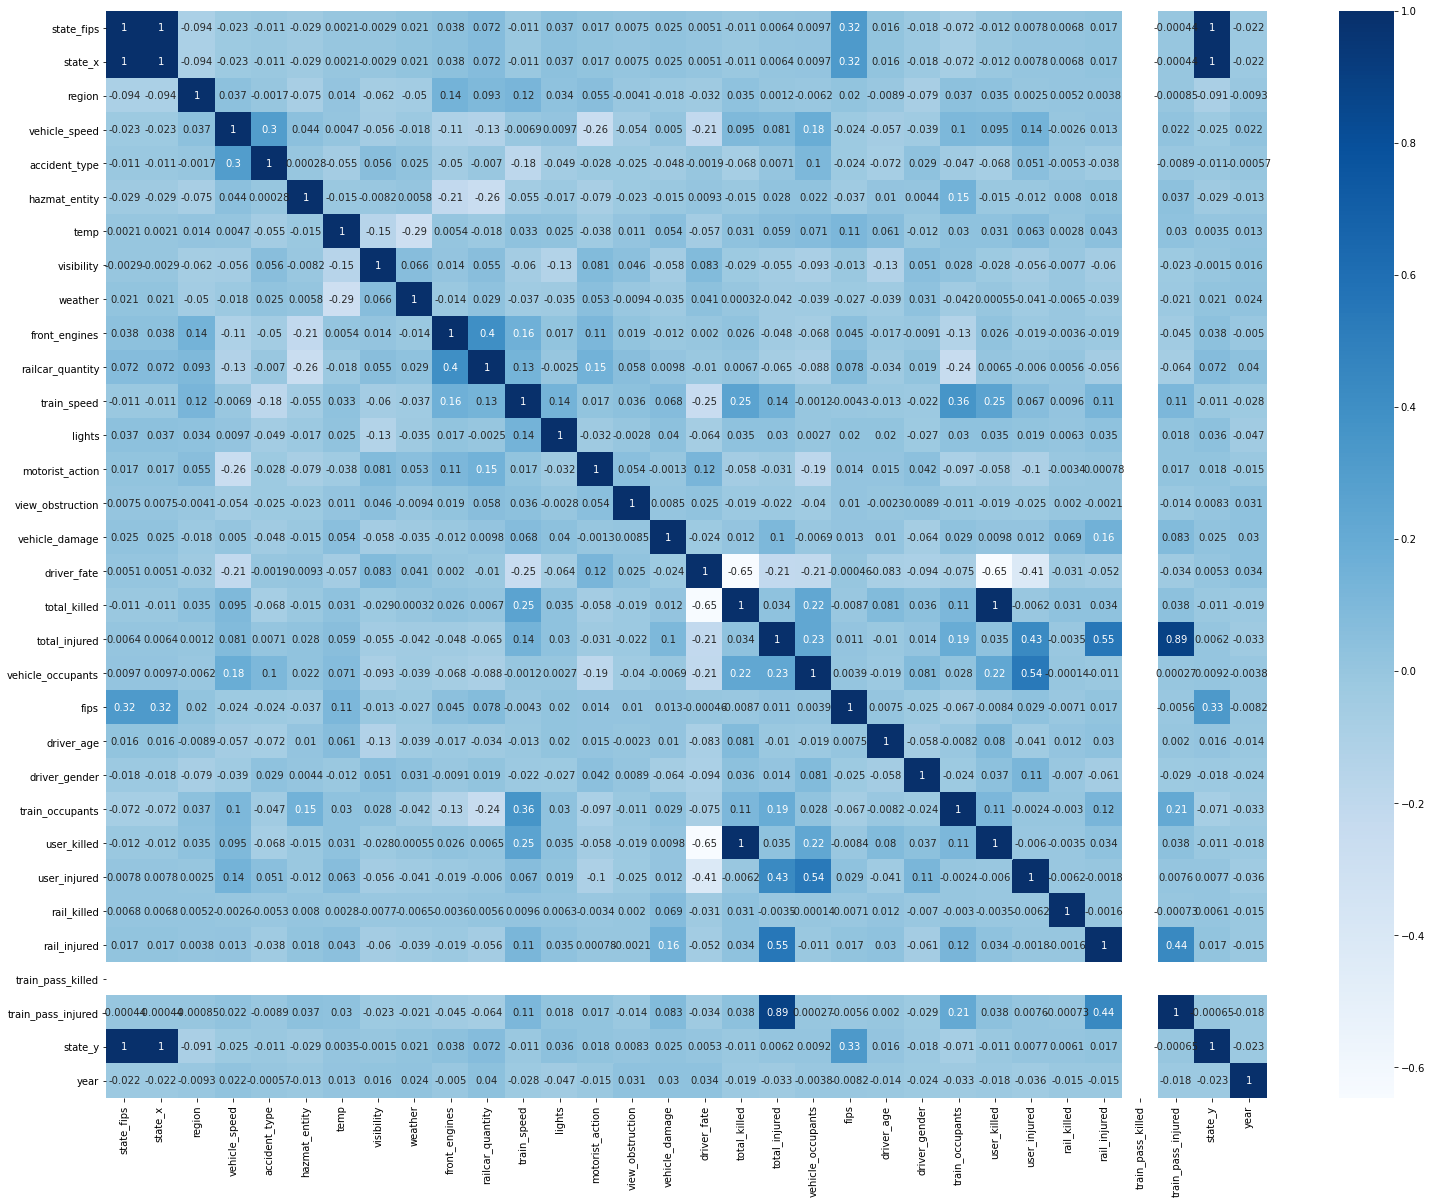

In [122]:

plt.figure(figsize=(26,20))
sns.heatmap(train.corr(), cmap='Blues', annot=True)
plt.show()

## Takeaways

- Not much strong positive or negative correlation

## Chi^2 Tests

<h3>Are accidents by rail company related to the season of year?</h3>

In [92]:
# Set our alpha
alpha = .05

In [93]:
# cross rail company vs season
observed = pd.crosstab(train.railroad_company, train.season)
observed

season,Fall,Spring,Summer,Winter
railroad_company,,,,
ATK,128,108,106,118
BNSF,316,256,298,294
CSX,372,356,347,381
KCS,69,59,67,55
NS,367,317,350,355
UP,421,364,434,377


In [94]:
# .chi2_contingency returns 4 different values
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [95]:
null_hypothesis = "rail accidents by company is independent of season"

if p < alpha:
    
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis that", null_hypothesis)

print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

We fail to reject the null hypothesis that rail accidents by company is independent of season
chi^2 = 10.8951
p     = 0.7600


<h3>Are accidents by rail company related to whether the crossing was lit by lights?</h3>

In [96]:
# Set our alpha
alpha = .05

In [97]:
# cross rail company vs lights
observed = pd.crosstab(train.railroad_company, train.lights)
observed

lights,1,2,3
railroad_company,,,
ATK,107,349,4
BNSF,278,861,25
CSX,545,910,1
KCS,7,243,0
NS,331,946,112
UP,482,1064,50


In [98]:
# .chi2_contingency returns 4 different values
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [99]:
null_hypothesis = "rail accidents by company is independent of whether the intersection was lit"

if p < alpha:
    
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")

print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

We reject the hypothesis that rail accidents by company is independent of whether the intersection was lit
chi^2 = 347.8054
p     = 0.0000


<h3>Are accidents by rail company related to the state where they occured?</h3>

In [100]:
# Set our alpha
alpha = .05

In [101]:
# cross rail company vs state
observed = pd.crosstab(train.railroad_company, train.state)
observed

state,AK,CA,CO,CT,DC,FL,GA,HI,ID,IL,...,RI,SC,SD,TN,VA,VT,WA,WI,WV,WY
railroad_company,,,,,,,,,,,,,,,,,,,,,
ATK,12,0,7,97,5,2,0,0,57,10,...,4,4,9,3,0,20,5,0,28,6
BNSF,9,52,28,99,34,0,0,0,0,0,...,0,112,5,0,35,0,14,0,209,0
CSX,166,0,0,0,0,1,3,1,139,169,...,122,0,0,60,0,95,79,0,0,0
KCS,0,0,12,0,0,0,0,0,0,0,...,0,8,0,0,0,0,1,0,86,0
NS,145,0,0,0,0,0,17,0,13,207,...,170,0,0,139,0,76,90,0,0,0
UP,0,33,121,162,37,0,0,0,0,0,...,0,51,23,0,0,0,0,20,589,0


In [102]:
# .chi2_contingency returns 4 different values
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [103]:
null_hypothesis = "rail accidents by company is independent of the state they occured in"

if p < alpha:
    
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")

print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

We reject the hypothesis that rail accidents by company is independent of the state they occured in
chi^2 = 8799.8179
p     = 0.0000


<h3>Is the fate of the driver (not-injured, injured, killed) related to the rail company involved?</h3>

In [104]:
# Set our alpha
alpha = .05

In [105]:
# cross rail company vs driver fate
observed = pd.crosstab(train.railroad_company, train.driver_fate)
observed

driver_fate,0,1,2,3
railroad_company,,,,
ATK,0,89,109,262
BNSF,0,103,314,747
CSX,0,96,398,962
KCS,3,16,77,154
NS,0,90,334,965
UP,0,118,436,1042


In [106]:
# .chi2_contingency returns 4 different values
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [107]:
null_hypothesis = "A drivers fate in an accident is independent of what rail company was involved in the accident"

if p < alpha:
    
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")

print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

We reject the hypothesis that A drivers fate in an accident is independent of what rail company was involved in the accident
chi^2 = 172.4270
p     = 0.0000


# Step 4: Modeling - Highway Rail

In [108]:
df = get_hwyrail()

In [109]:
df = prep_hwy_df(df)

In [110]:
df = get_dummies(df)

In [111]:
hwydf = df[['railroad_company', 'fips', 'railcar_quantity', 'vehicle_damage']]
hwydf.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 11278 entries, 0312RS009 to 153974
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   railroad_company  11278 non-null  object 
 1   fips              11278 non-null  int64  
 2   railcar_quantity  11278 non-null  int64  
 3   vehicle_damage    11278 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 440.5+ KB


In [112]:
hwydf = df[['year', 'weather', 'lights', 'driver_fate', 'fips', 'railcar_quantity', 'vehicle_damage', 'motorist_action',
           'view_obstruction', 'whistle_ban', 'front_engines' ]]
hwydf.info()   

<class 'pandas.core.frame.DataFrame'>
Index: 11278 entries, 0312RS009 to 153974
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              11278 non-null  int64  
 1   weather           11278 non-null  int64  
 2   lights            11278 non-null  int64  
 3   driver_fate       11278 non-null  int64  
 4   fips              11278 non-null  int64  
 5   railcar_quantity  11278 non-null  int64  
 6   vehicle_damage    11278 non-null  float64
 7   motorist_action   11278 non-null  int64  
 8   view_obstruction  11278 non-null  int64  
 9   whistle_ban       11278 non-null  object 
 10  front_engines     11278 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 1.0+ MB


In [113]:
hwydf.weather = pd.to_numeric(hwydf.weather, errors='coerce').fillna(0).astype(int)

In [114]:
hwydf.lights = pd.to_numeric(hwydf.lights, errors='coerce').fillna(0).astype(int)

In [115]:
hwydf.driver_fate = pd.to_numeric(hwydf.driver_fate, errors='coerce').fillna(0).astype(int)

In [116]:
hwydf.motorist_action = pd.to_numeric(hwydf.motorist_action, errors='coerce').fillna(0).astype(int)

In [117]:
hwydf.whistle_ban = pd.to_numeric(hwydf.whistle_ban, errors='coerce').fillna(0).astype(int)

In [118]:
train, validate, X_train, y_train, X_validate, y_validate, X_test, y_test = train_validate_test(hwydf, 'railroad_company')

KeyError: "['railroad_company'] not found in axis"

In [ ]:
X_train.shape, X_validate.shape, X_test.shape

In [ ]:
object_cols = get_object_cols(hwydf)

In [ ]:
numeric_cols = get_numeric_X_cols(X_train, object_cols)

In [ ]:
X_train_scaled, X_validate_scaled, X_test_scaled = min_max_scale(X_train, X_validate, X_test, numeric_cols)

In [ ]:
X_train_scaled

In [ ]:
# parameters: f_regression stats test, give me 8 features
f_selector = SelectKBest(f_regression, k=5)

# find the top 8 X's correlated with y
f_selector.fit(X_train_scaled, y_train)

# boolean mask of whether the column was selected or not. 
feature_mask = f_selector.get_support()

## Baseline

In [ ]:
df.railroad_company.value_counts()

In [ ]:
print(f'Baseline Accuracy: {round(max(df.railroad_company.value_counts()) / df.shape[0] *100)}%')

--------

## Logistic Regression

-----------

In [ ]:
#Using the scaled data, make a logistic regression model
lm = LogisticRegression()

#Fit the lm object to the vectorized data
lm.fit(X_train_scaled, y_train)

#Create corresponding dataframes 
train = pd.DataFrame(dict(actual=y_train))
validate = pd.DataFrame(dict(actual=y_validate))
test = pd.DataFrame(dict(actual=y_test))

#Form predictions uisng the lm model
train['predicted'] = lm.predict(X_train_scaled)
validate["predicted"] = lm.predict(X_validate_scaled)
test['predicted'] = lm.predict(X_test_scaled)

#Review how the lm model performed on the in-sample data
print('In-sample data model performance:')
print(classification_report(train.actual, train.predicted, zero_division=0))
print('----------------')
#Review how the lm model performed on the out-of-sample data
print('Out-of-sample data model performance:')
print(classification_report(validate.actual, validate.predicted, zero_division=0))

-------

## KNN

----------

In [ ]:
#Create the KNN object with a k = 5
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')

#Fit the object to the scaled training data
knn.fit(X_train_scaled, y_train)

#Create corresponding dataframes 
train = pd.DataFrame(dict(actual=y_train))
validate = pd.DataFrame(dict(actual=y_validate))
test = pd.DataFrame(dict(actual=y_test))

#Form predictions uisng the knn model
train['predicted'] = knn.predict(X_train_scaled)
validate["predicted"] = knn.predict(X_validate_scaled)

#Review how the knn model performed on the in-sample data
print('In-sample data model performance:')
print(classification_report(train.actual, train.predicted,  zero_division=0))
print('----------------')
#Review how the knn model performed on the out-of-sample data
print('Out-of-sample data model performance:')
print(classification_report(validate.actual, validate.predicted, zero_division=0))

--------

## Random Forest

--------

In [ ]:
#Create the RF object
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=2,
                            n_estimators=100,
                            max_depth=10, 
                            random_state=123)

#Fit the RF object to the training data
rf.fit(X_train_scaled, y_train)

#Predict on y
y_pred = rf.predict(X_train_scaled)

#Evaluate on train
print('In-sample data model performance:')
print(classification_report(y_train, y_pred))


#Predict using out of sample data
y_pred = rf.predict(X_validate_scaled)
print('----------------')
print('Out-of-sample data model performance:')
print(classification_report(y_validate, y_pred, zero_division=0))

---------

## Decision Tree

-----------

In [ ]:
#Make the CLF object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=123)

#Fit the model on the training set 
clf = clf.fit(X_train_scaled, y_train)

#Make predictions
y_pred = clf.predict(X_train_scaled)

#Evaluate model performance on training data
print('In-sample data model performance:')
print(classification_report(y_train, y_pred))

# Predict on validate
y_pred = clf.predict(X_validate_scaled)

# Evaluate model performance on out-of-sample data
print('Out-of-sample data model performance:')
print(classification_report(y_validate, y_pred, zero_division=0))

In [ ]:
#Predict on y
y_pred = rf.predict(X_test_scaled)

#Evaluate
print('In-sample data model performance:')
print(classification_report(y_test, y_pred))

## Takeaways:
- Baseline accuracy for predicting railroad involved in a highway rail accident was 24%

- Classification Models improved significantly with the addition of damages as a feature.

- Random Forest Classifier was the best performing algorithm achieving an overall accuracy score of x% on out-of-sample data. 

----------

# Conclusion and Next Steps
- The fact that there were not any distinguishing characteristics of equipment rail accidents for predicting the railroad company involved in an incident is encouraging!
- It signifies that no one company is acting with more or less negligence / risk than any other railroad company. At least in a manner that is statistically significant.
- The next steps are to see if there are features that would assist in predicting total damages of an equipment rail incident.